In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import streamlit as st
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from statsmodels.formula.api import ols
from IPython.display import Image
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,log_loss
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)



# use case
# perform data cleaning 
# perform EDA to analyse data with diagrams
# perfrom pre processing like scaling
# split data into x and Y variables
# build model(use different classifier) and tuning (using random search)
# conclusion

In [3]:
# Use the absolute path to the xls file
file_path = '/Users/saheedadeitan/Downloads/BusyQA_bootcamp//default of credit card clients.xls'
# Read the xls file into a DataFrame, function sheet_name and header to work on the selected header
df = pd.read_excel(file_path, sheet_name= "Data", header = 1)

# Display the first few rows of the DataFrame to verify the import
df.describe()

# always check for sheet name to confirm you are on the right file .
# i remove the first the row

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# list of head columns
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# dataset itself
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
# checking for value types
dict(df.dtypes)

{'ID': dtype('int64'),
 'LIMIT_BAL': dtype('int64'),
 'SEX': dtype('int64'),
 'EDUCATION': dtype('int64'),
 'MARRIAGE': dtype('int64'),
 'AGE': dtype('int64'),
 'PAY_0': dtype('int64'),
 'PAY_2': dtype('int64'),
 'PAY_3': dtype('int64'),
 'PAY_4': dtype('int64'),
 'PAY_5': dtype('int64'),
 'PAY_6': dtype('int64'),
 'BILL_AMT1': dtype('int64'),
 'BILL_AMT2': dtype('int64'),
 'BILL_AMT3': dtype('int64'),
 'BILL_AMT4': dtype('int64'),
 'BILL_AMT5': dtype('int64'),
 'BILL_AMT6': dtype('int64'),
 'PAY_AMT1': dtype('int64'),
 'PAY_AMT2': dtype('int64'),
 'PAY_AMT3': dtype('int64'),
 'PAY_AMT4': dtype('int64'),
 'PAY_AMT5': dtype('int64'),
 'PAY_AMT6': dtype('int64'),
 'default payment next month': dtype('int64')}

In [11]:
# checking for no of columns and cloumns in dataset
print('Number of columns: ' + str(len(df.columns)))
print('Columns in df: ' + str(df.columns))

Number of columns: 25
Columns in df: Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [12]:
# list of columns without Y 
df.drop('default payment next month', axis=1).columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [13]:
# no of rows
print('Number of rows: ' + str(df.shape[0]))

Number of rows: 30000


In [14]:
# information about the given dataset, like the range, no of columns, the type of value 
# the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:
# checking array for column ('Y : default payment next month')
df['default payment next month'].unique()

array([1, 0])

In [16]:
# checking correlation in the dataset
df.corr

<bound method DataFrame.corr of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  

In [17]:
# data cleaning
#  checking for missing values, no missing value seen, no ? or nan
dict(df.isnull().sum())

{'ID': 0,
 'LIMIT_BAL': 0,
 'SEX': 0,
 'EDUCATION': 0,
 'MARRIAGE': 0,
 'AGE': 0,
 'PAY_0': 0,
 'PAY_2': 0,
 'PAY_3': 0,
 'PAY_4': 0,
 'PAY_5': 0,
 'PAY_6': 0,
 'BILL_AMT1': 0,
 'BILL_AMT2': 0,
 'BILL_AMT3': 0,
 'BILL_AMT4': 0,
 'BILL_AMT5': 0,
 'BILL_AMT6': 0,
 'PAY_AMT1': 0,
 'PAY_AMT2': 0,
 'PAY_AMT3': 0,
 'PAY_AMT4': 0,
 'PAY_AMT5': 0,
 'PAY_AMT6': 0,
 'default payment next month': 0}

In [ ]:
#EDA

# Pearson’s correlation coefficient measures the statistical relationship, or association, between two continuous variables. 
# It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.
# from the diagram below, it shows numerical value not categorical association of the values. i should not be using perarson correlation
# Age and marriage (age on Y axis and marriage on x axis) and (marriage on y axis and age on x axis)  both have the same value
# PAY_0 and PAY_2 (0.32, 0.26) have close association with our target variable 'default payment next month', whuch might affect our models.
# same with LIMIT_BAL on x axis and BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 on Y-axis (0.29, 0.28, 0.28, 0.29, 0.3, 0.29)
# BILL_AMT6 on y axis and BIL_AMT1 gives 0.8, BIL_AMT2  gives 0.83, BIL_AMT3 0.85. since the values looks similar, we can remove one of the values as zero

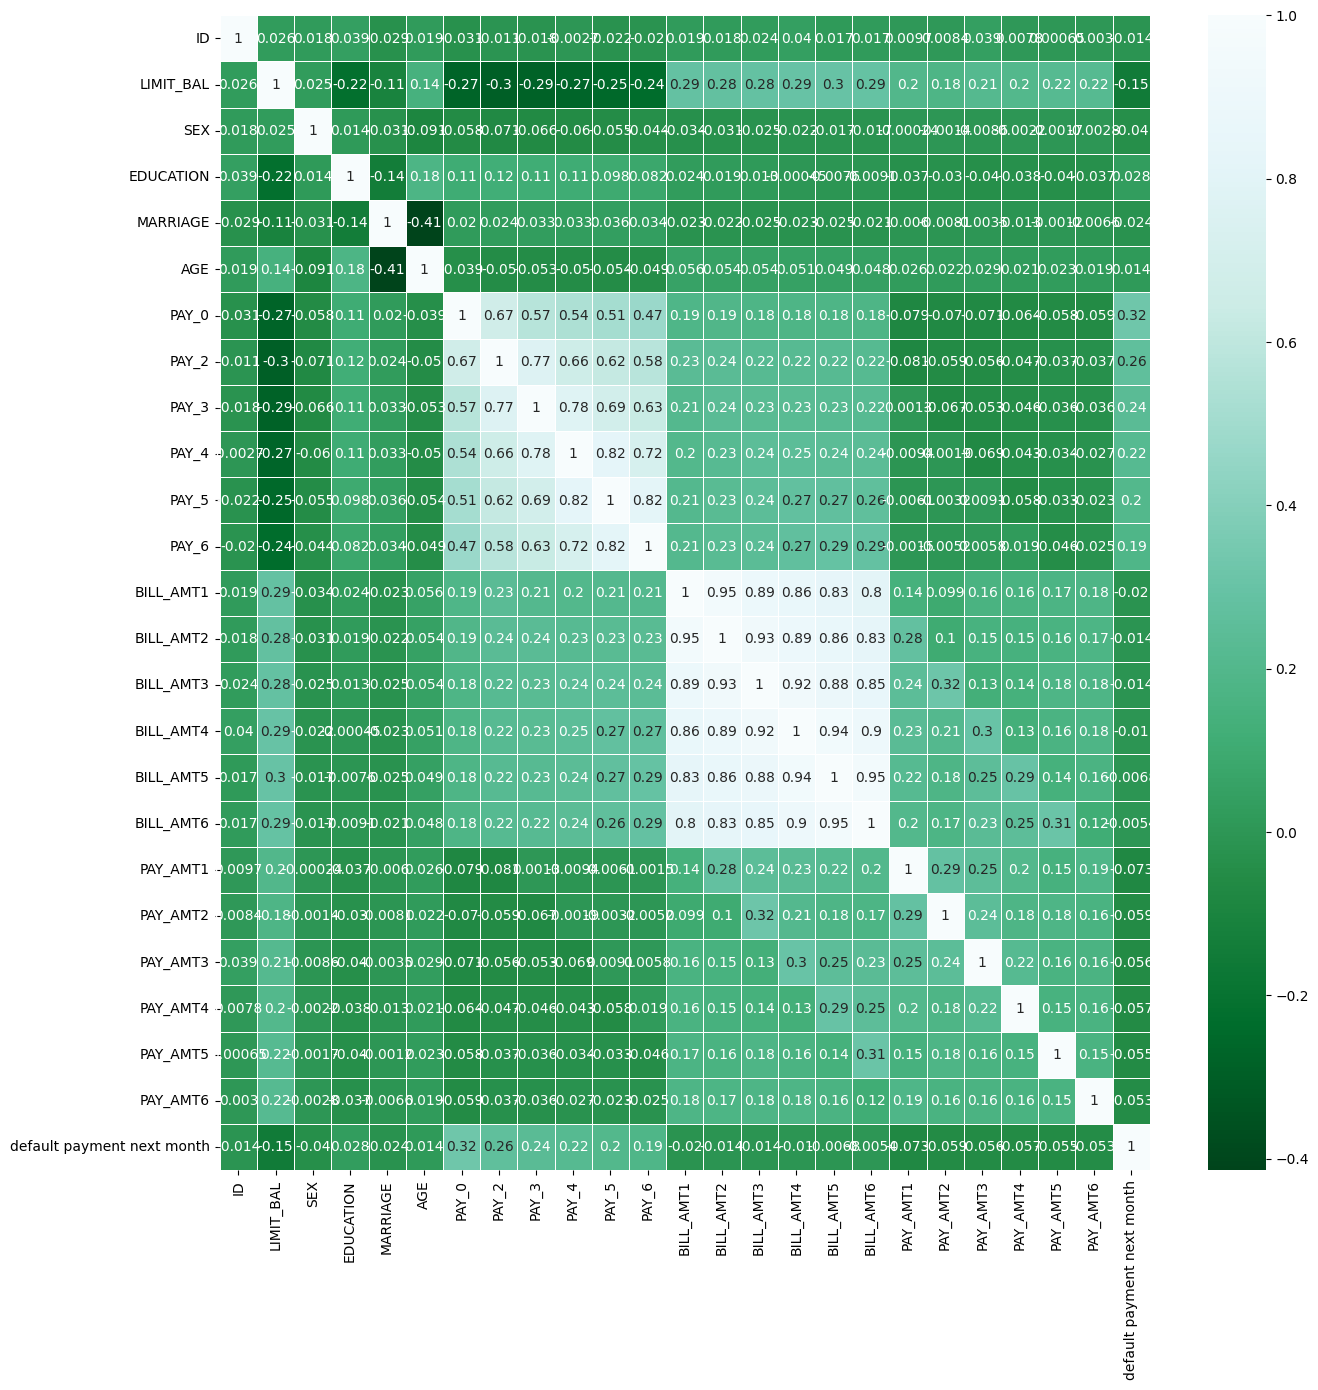

In [18]:
# Pearson’s correlation coefficient
a = df.corr()
plt.rcParams['figure.figsize']=(15,15)
ax = sns.heatmap(a, linewidth=0.5, cmap= 'BuGn_r', annot = True)
# plot the heatmap
plt.show()

# or using heatmap
# age and marriage have the same value (age on Y axis and marriage on x axis) and (marriage on y axis and age on x axis)

<Axes: >

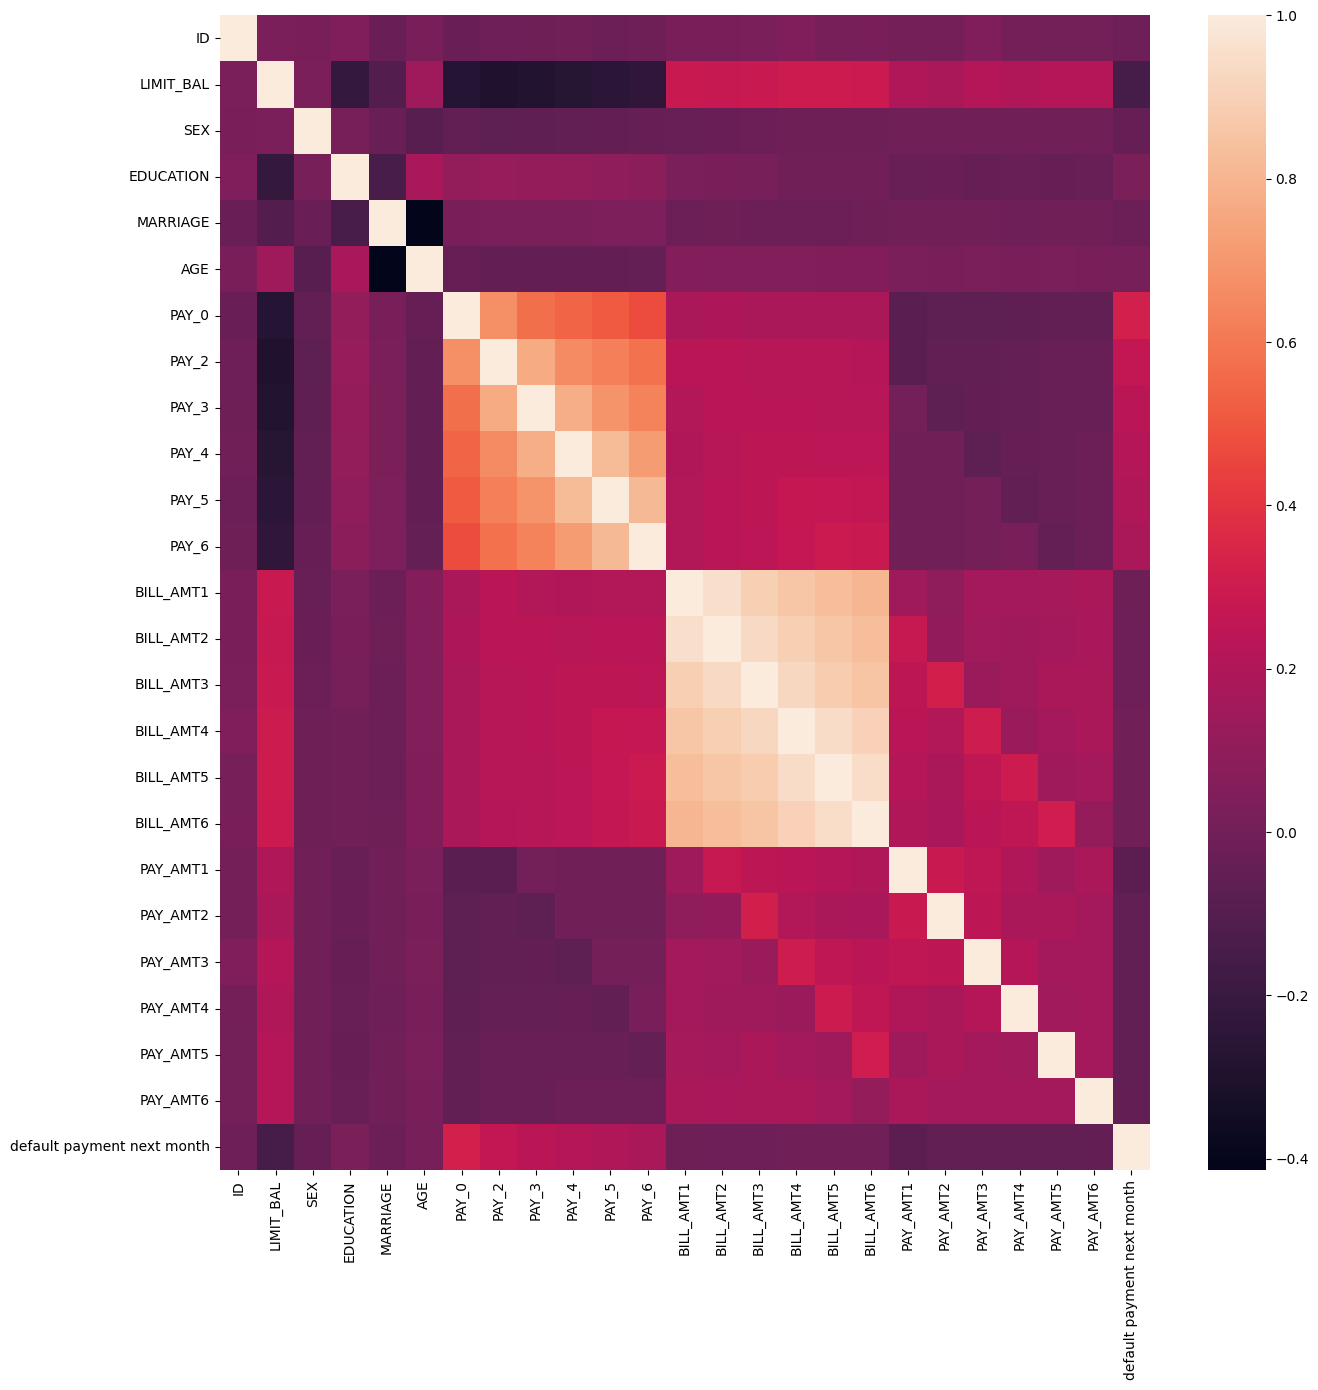

In [20]:
# Heatmap
# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

                                             |          | [  0%]   00:00 -> (? left)


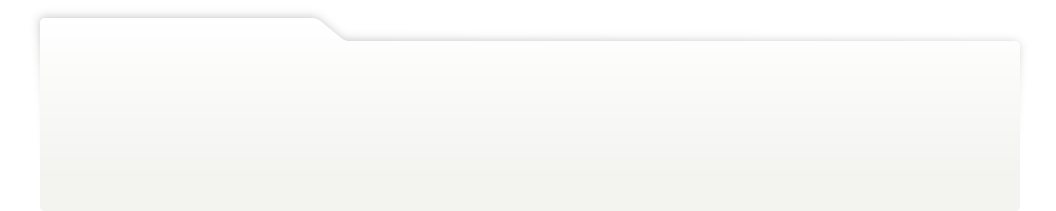
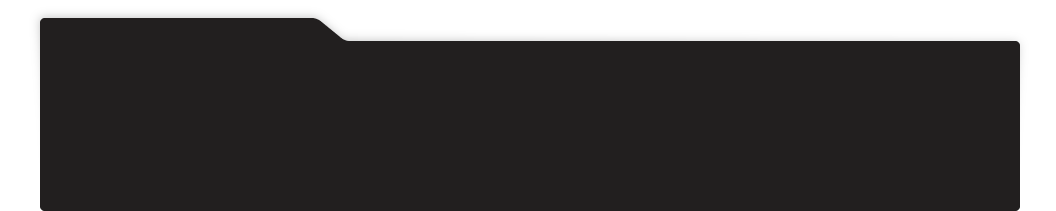
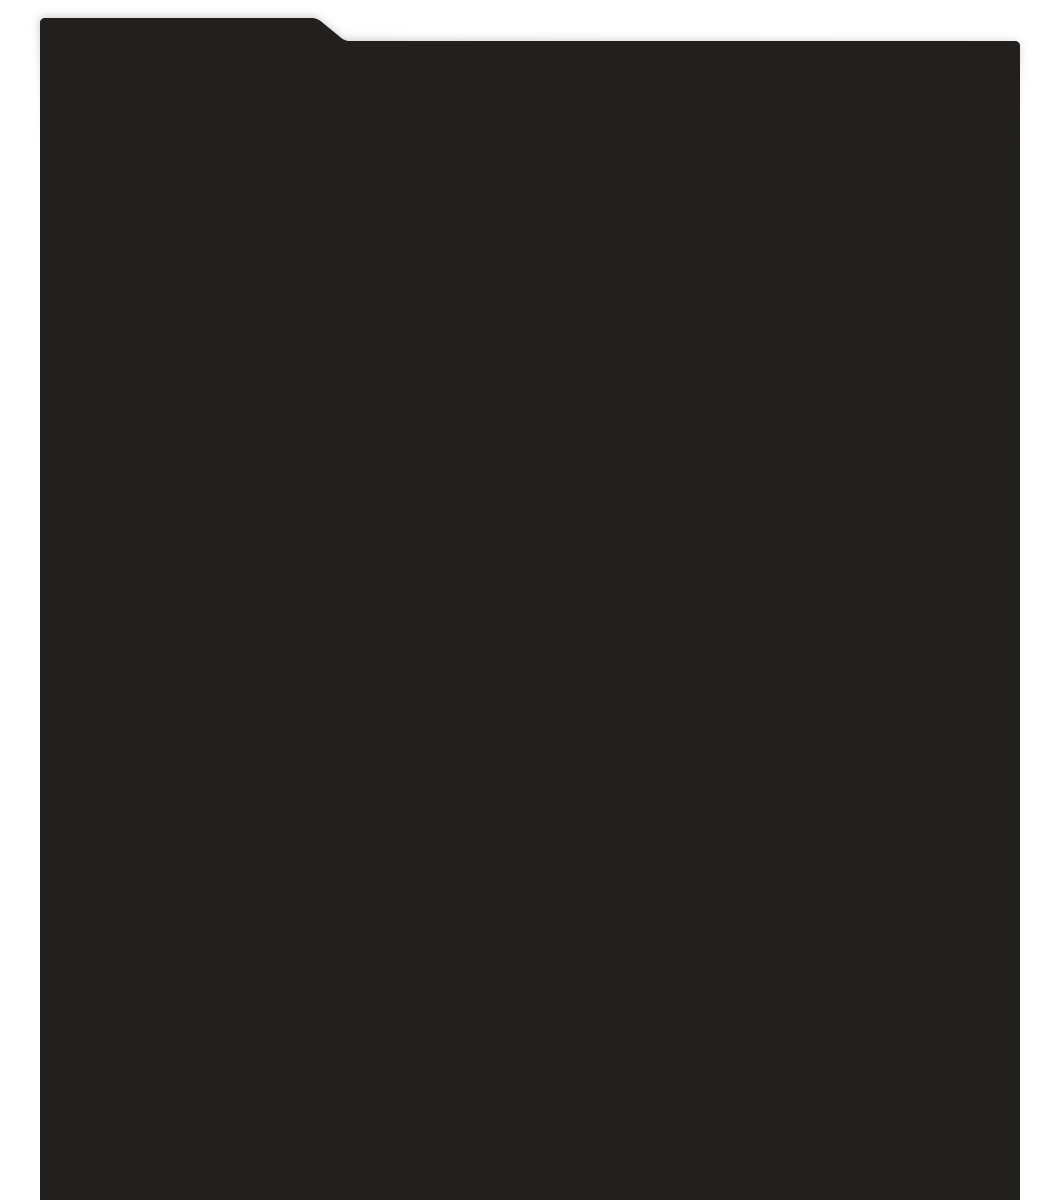
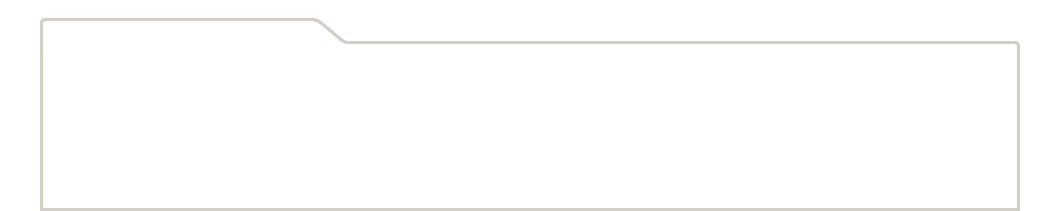
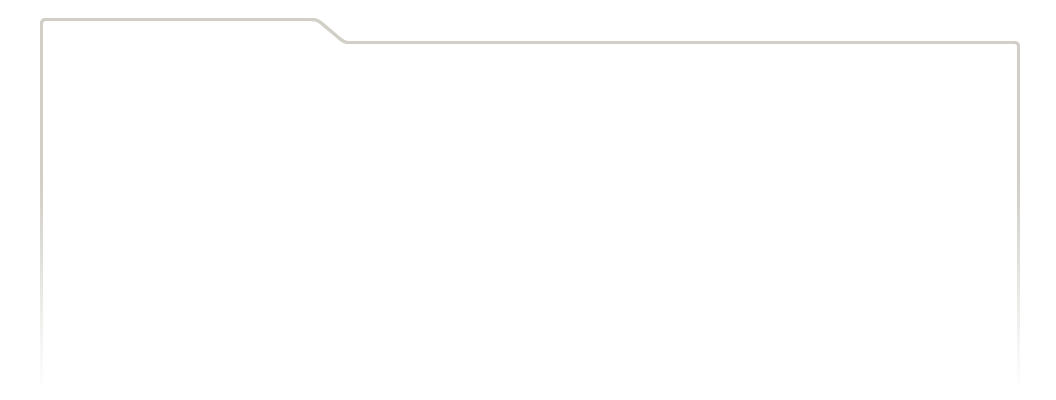
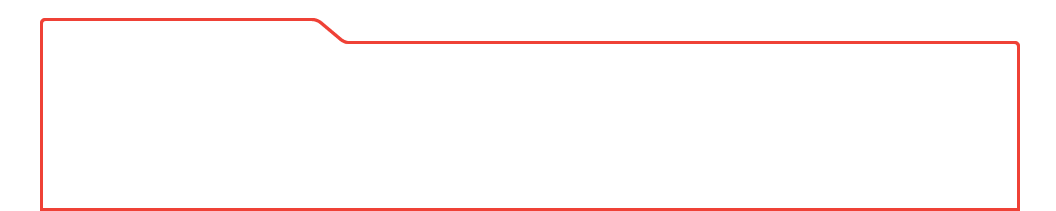
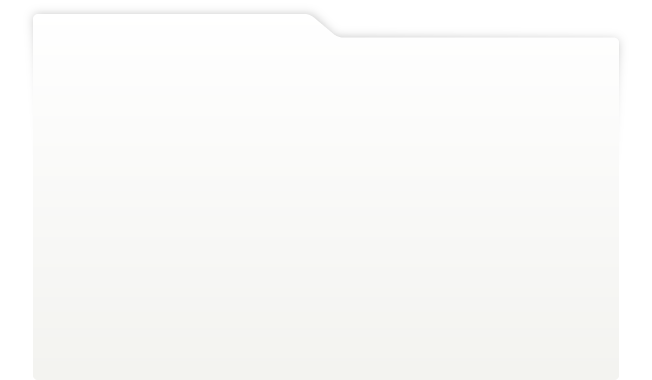
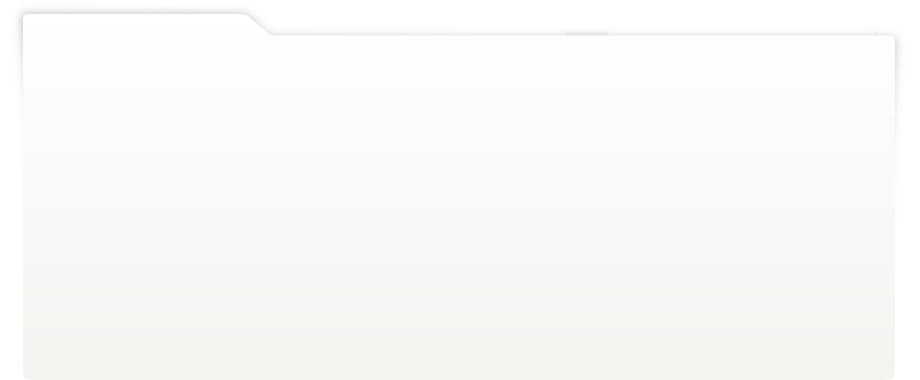
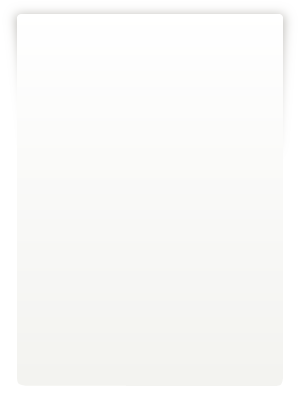
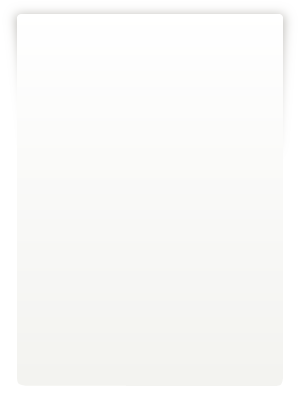
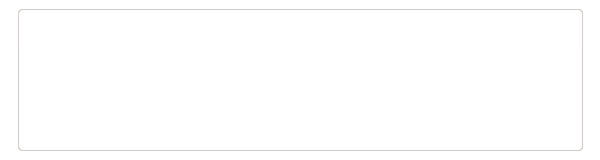
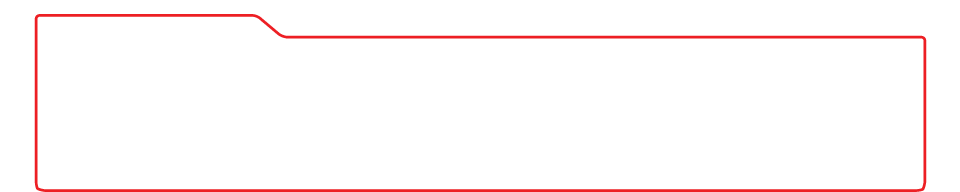
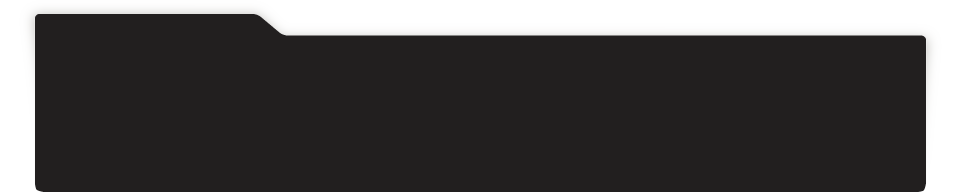
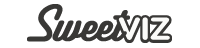
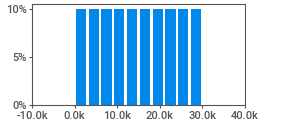
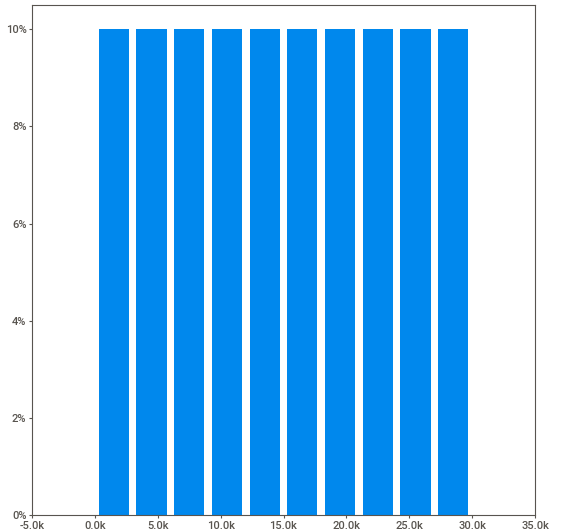
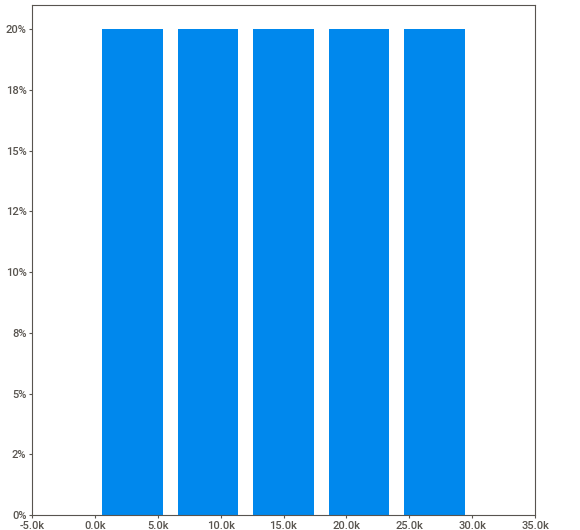
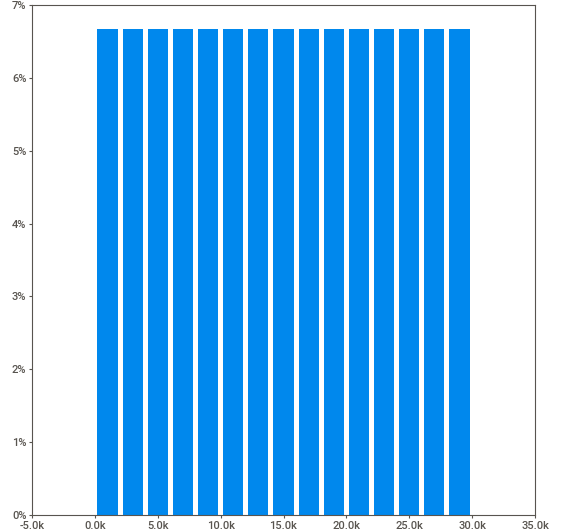
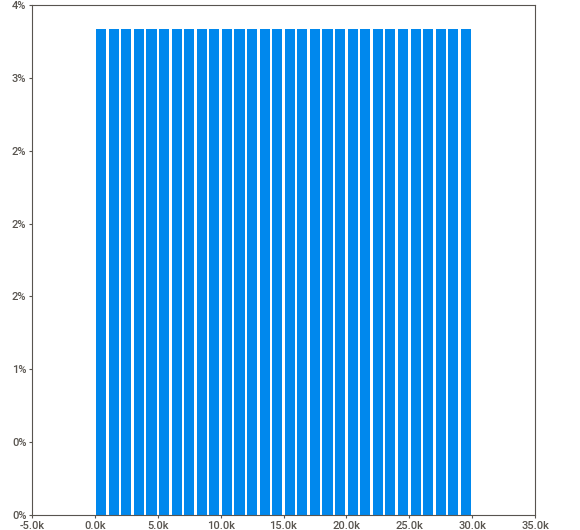
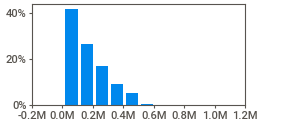
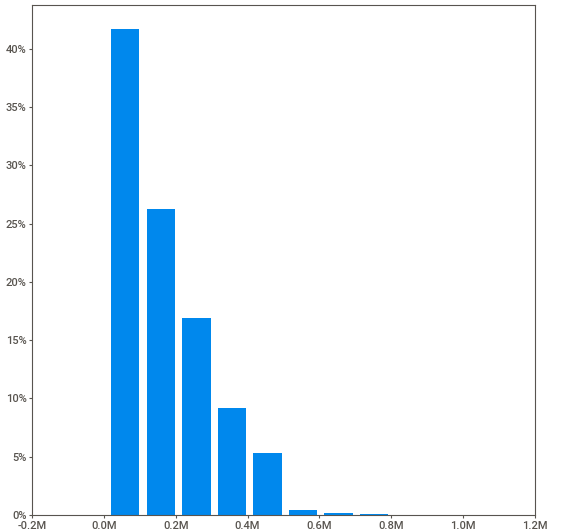
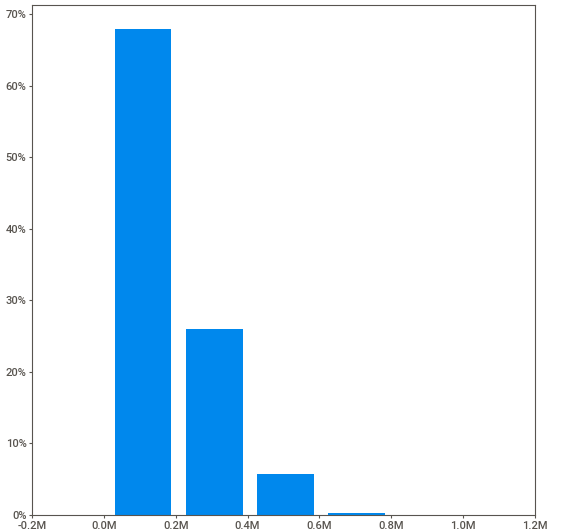
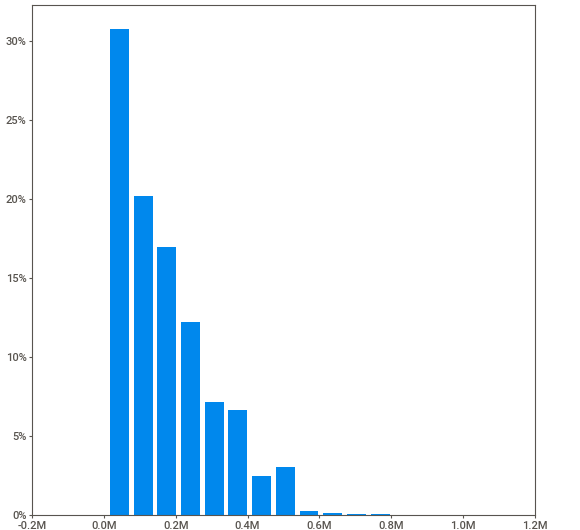
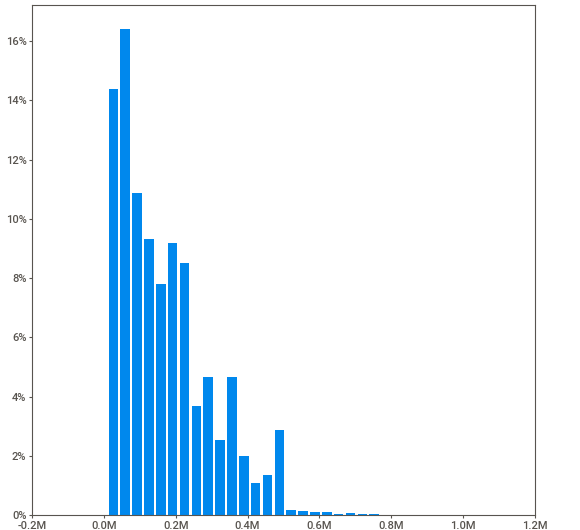
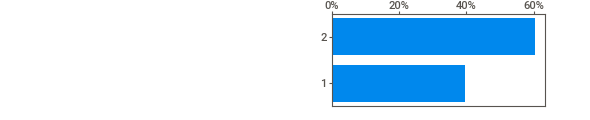
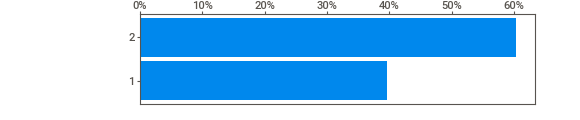
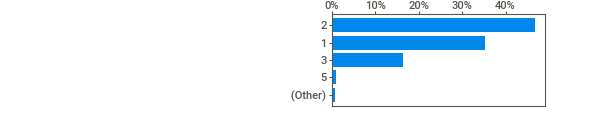
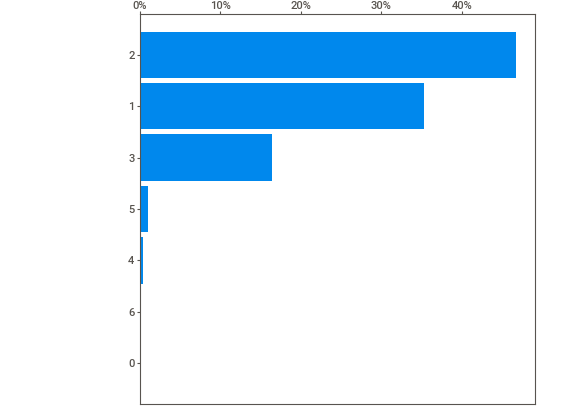
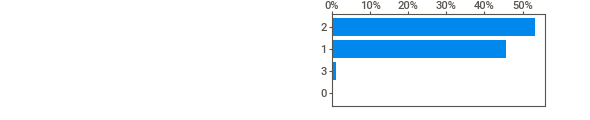
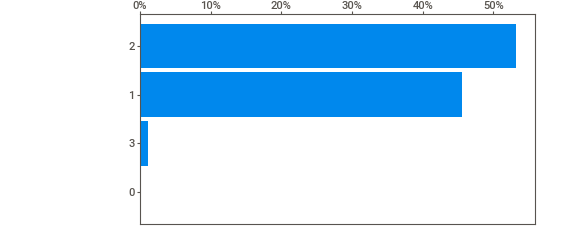
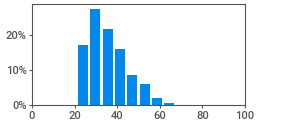
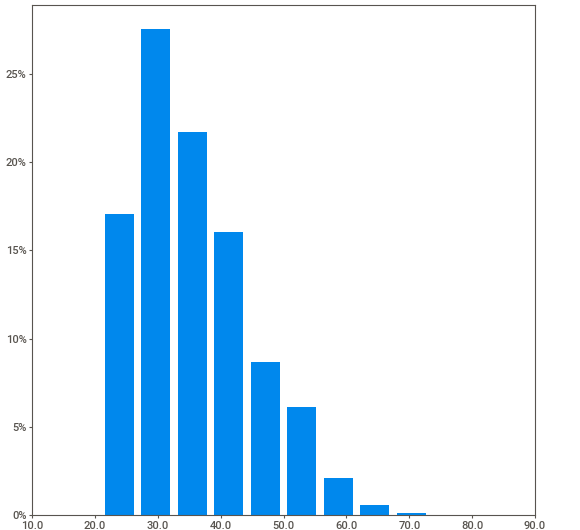
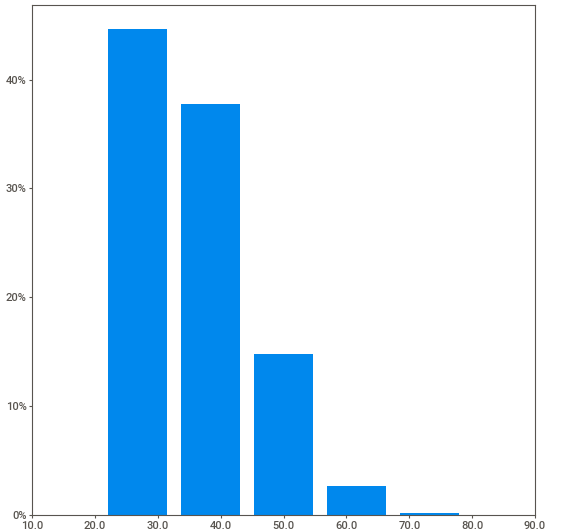
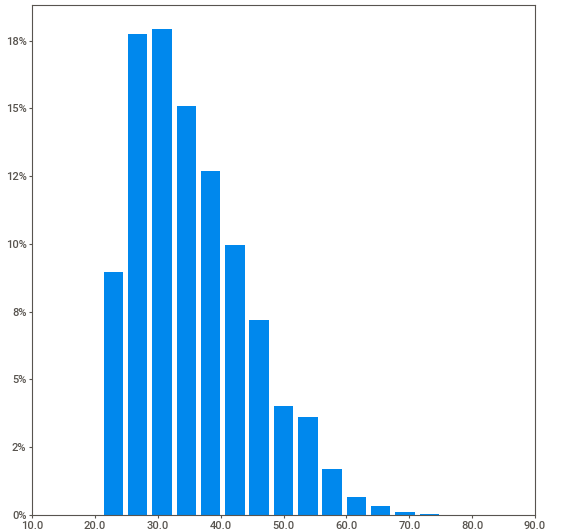
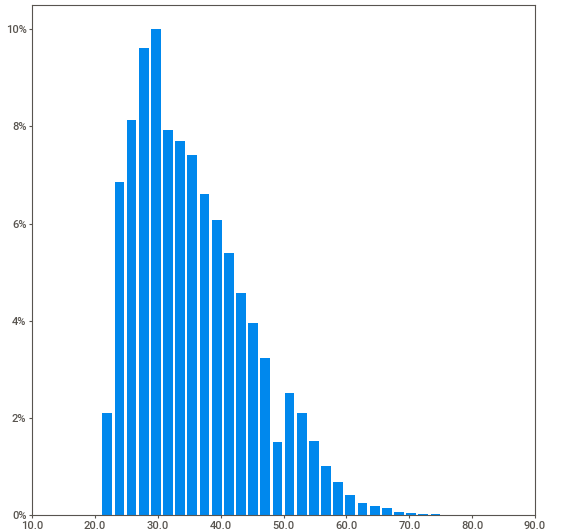
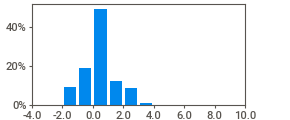
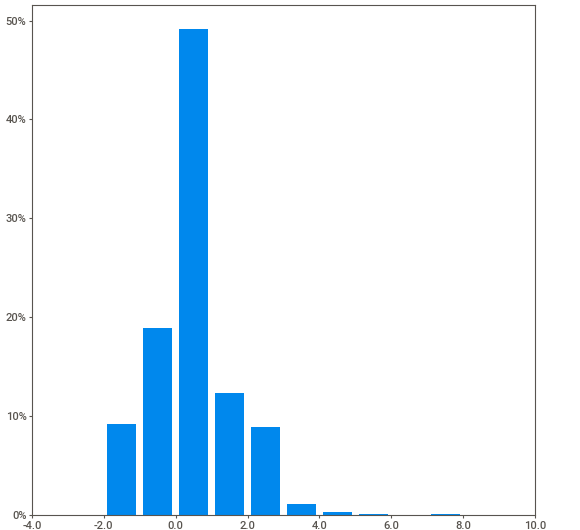
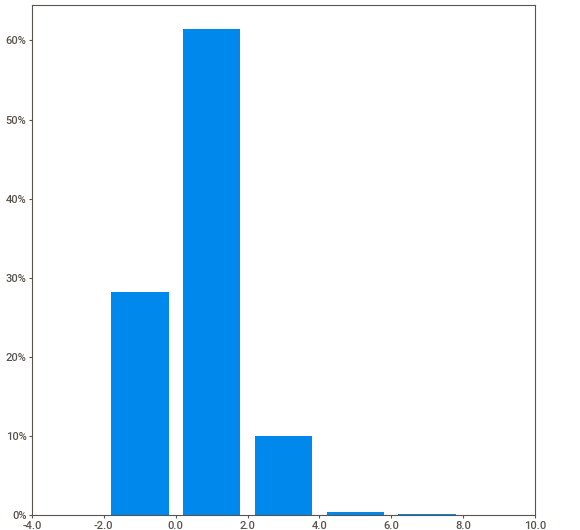
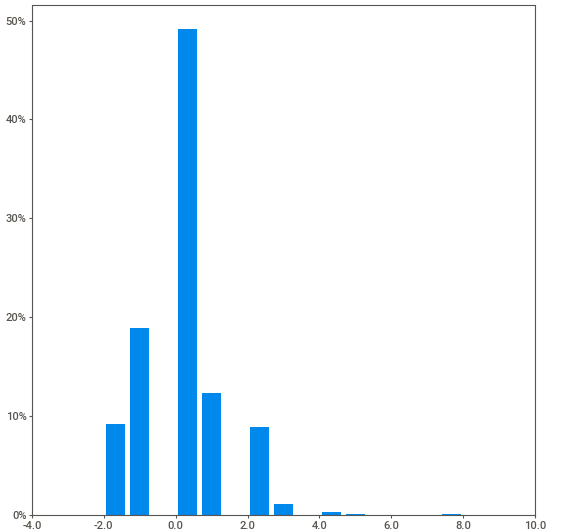
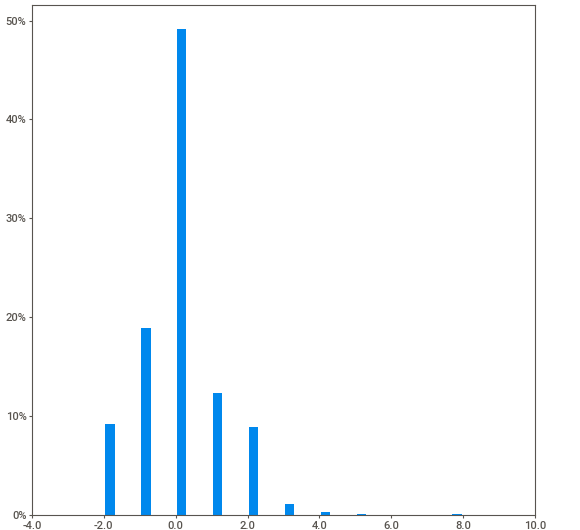
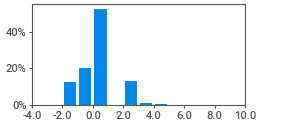
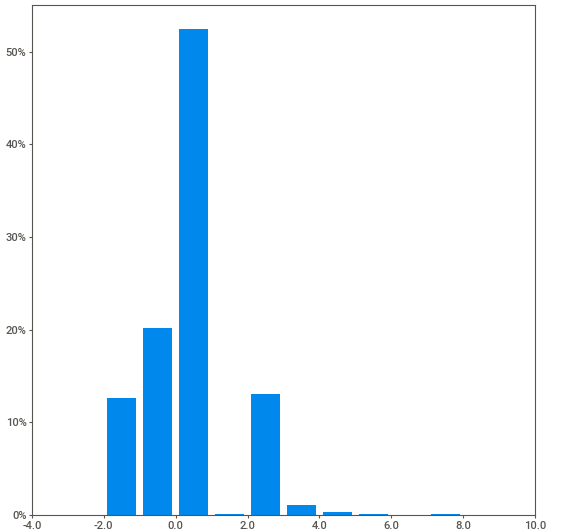
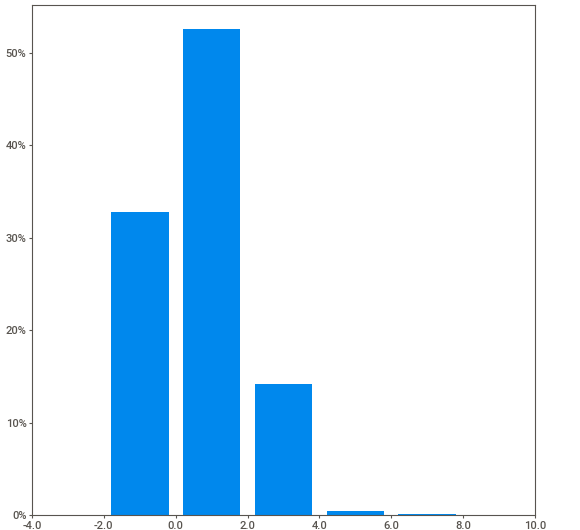
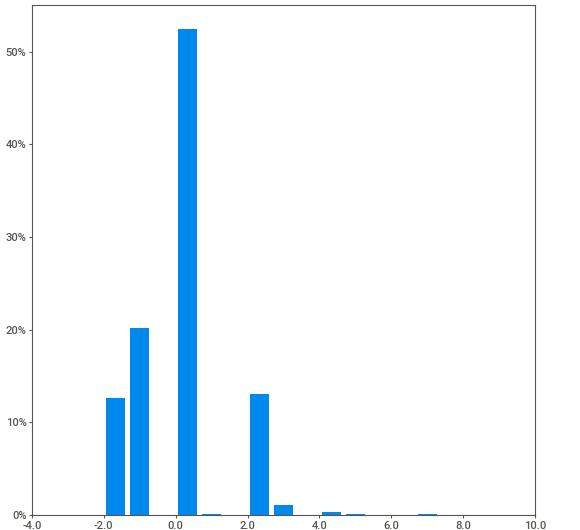
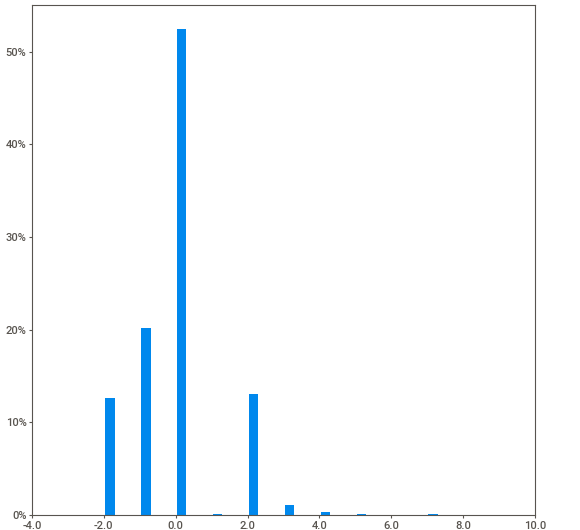
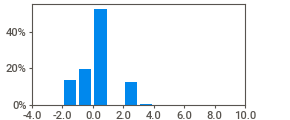
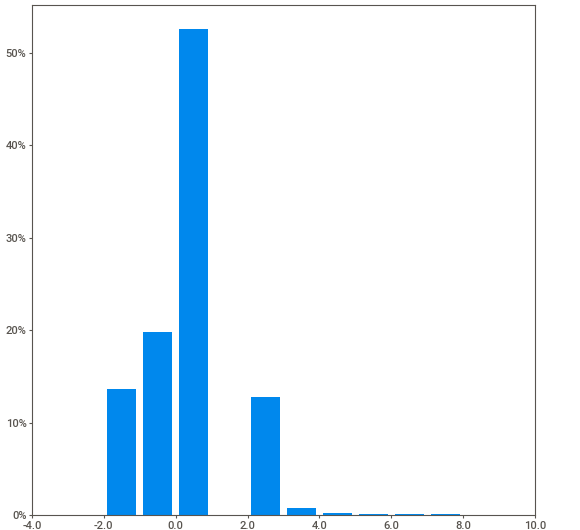
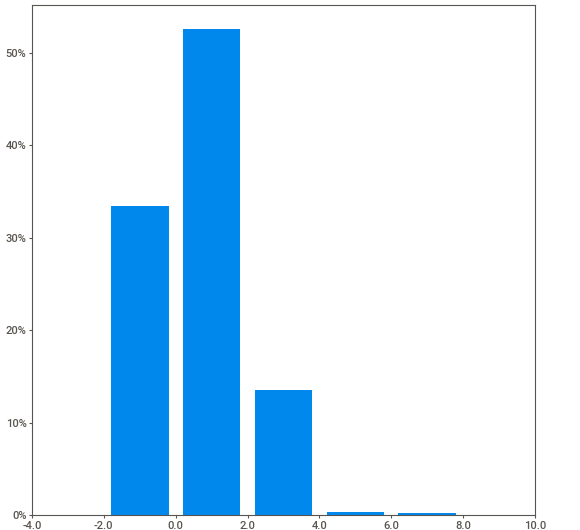
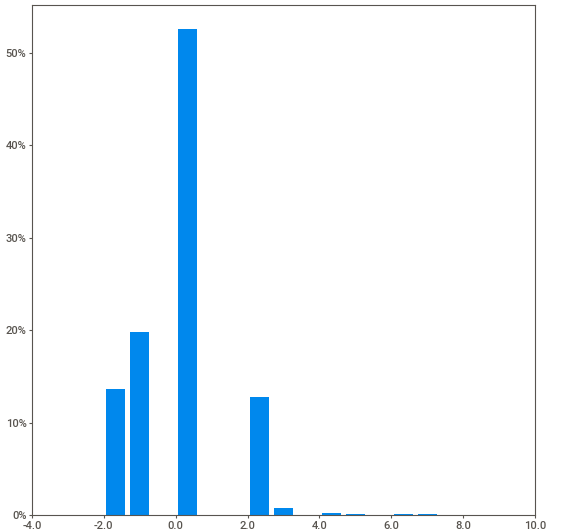
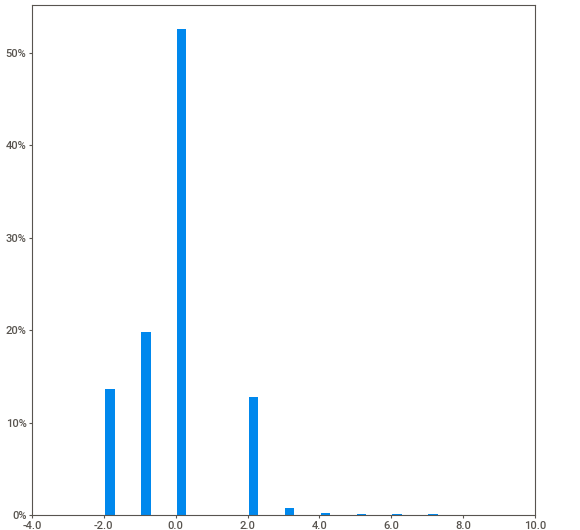
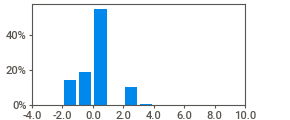
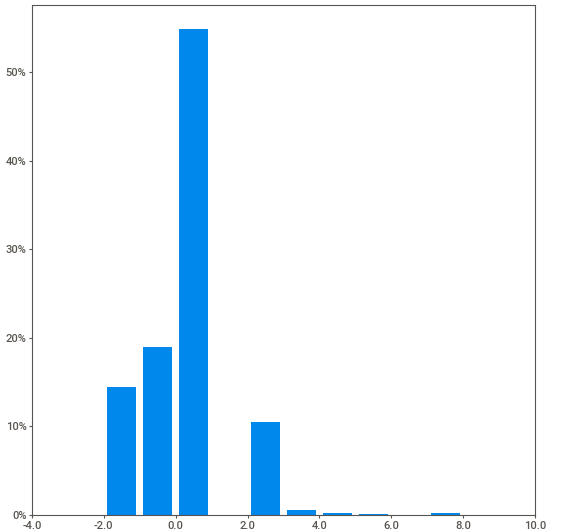
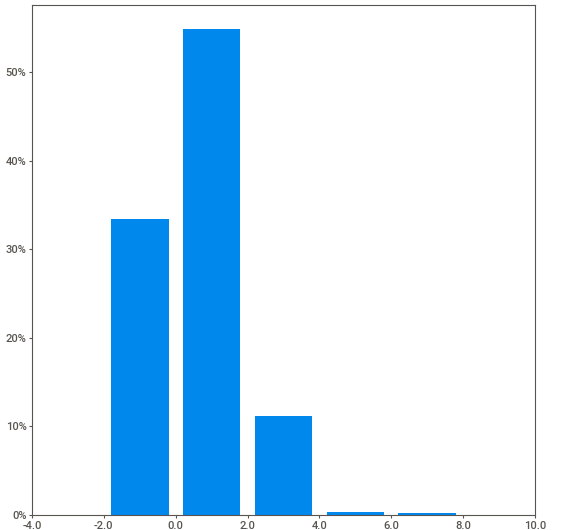
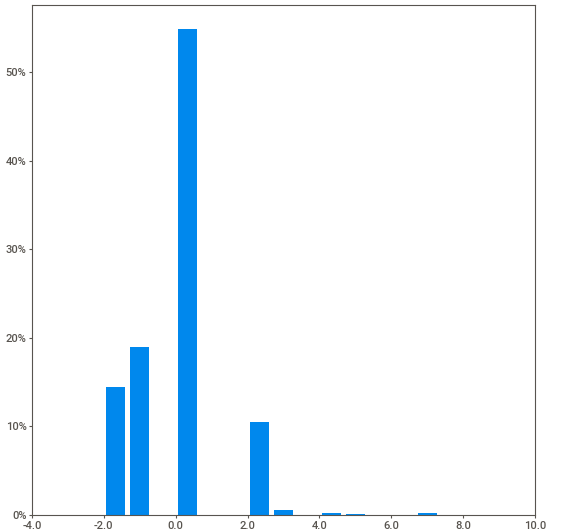
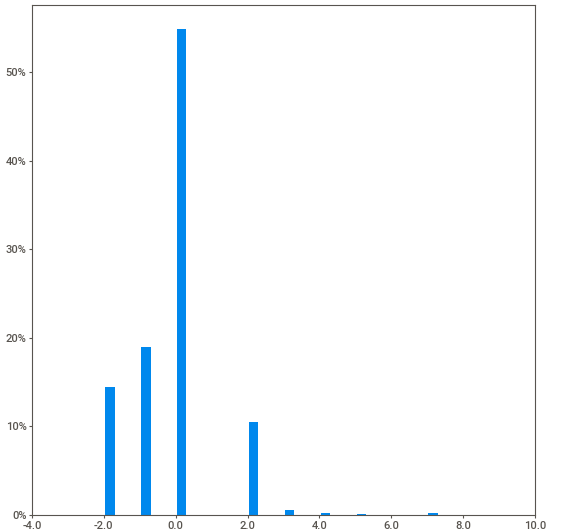
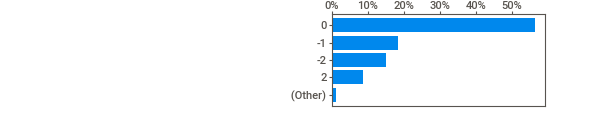
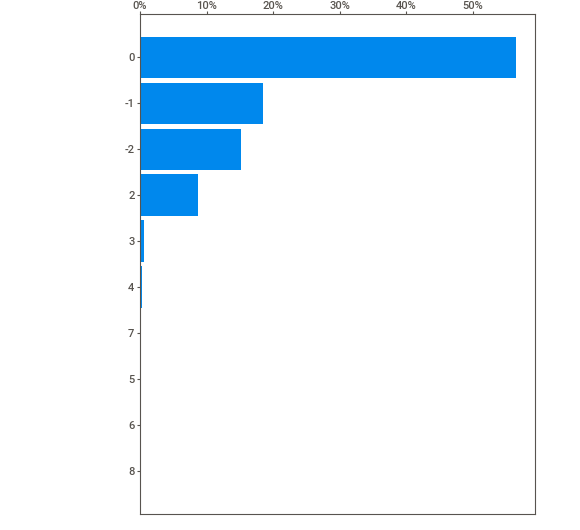
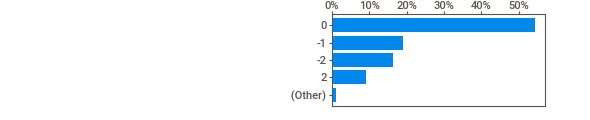
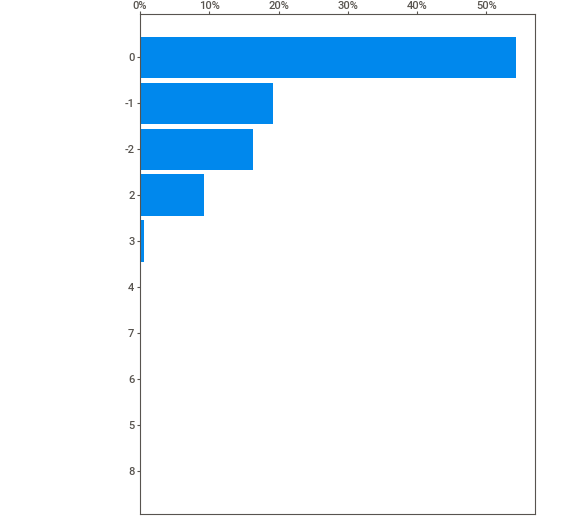
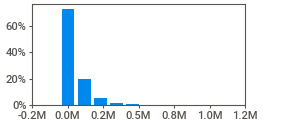
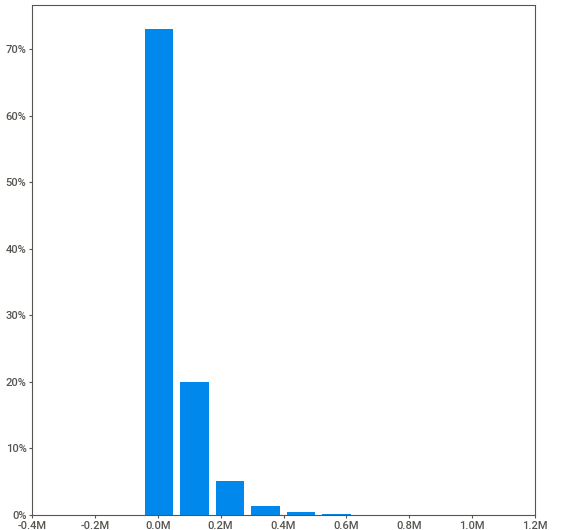
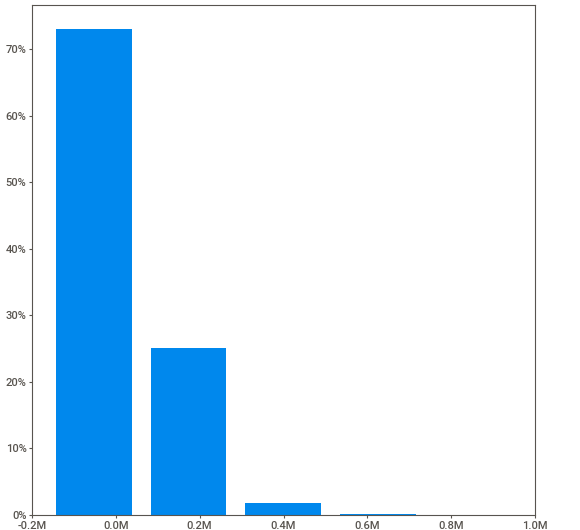
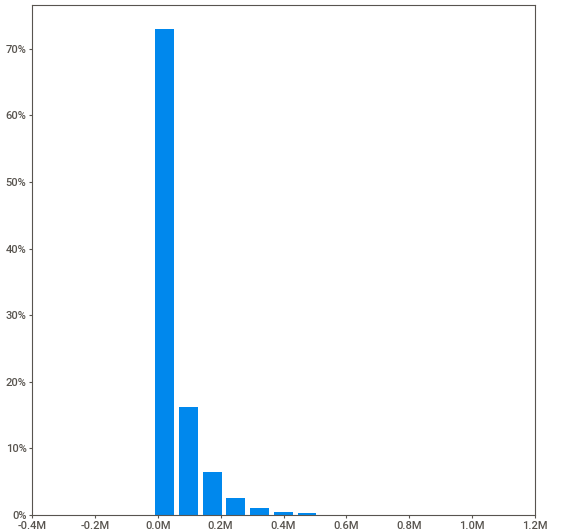
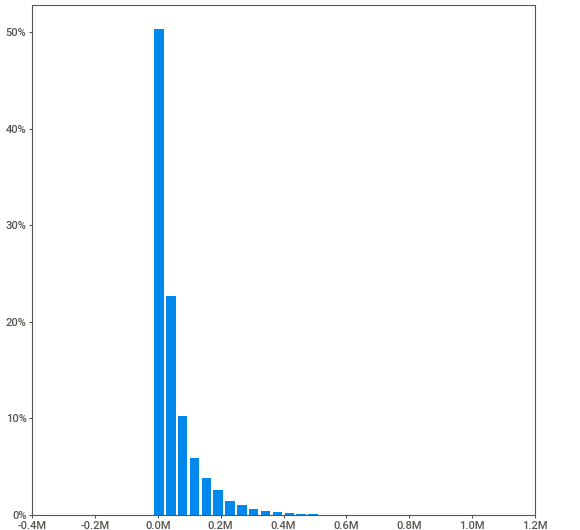
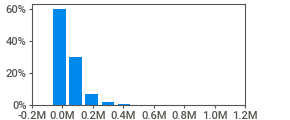
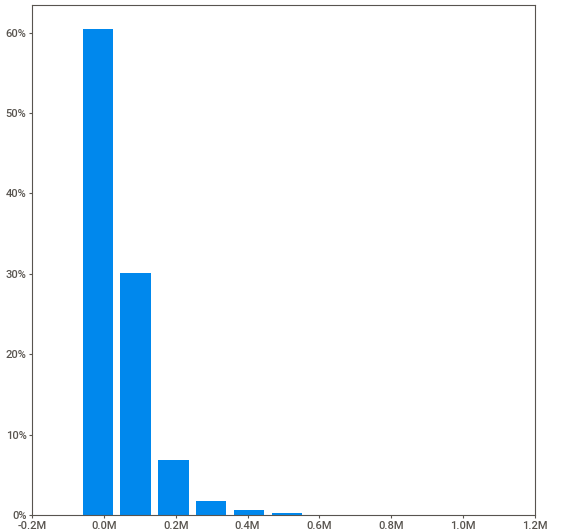
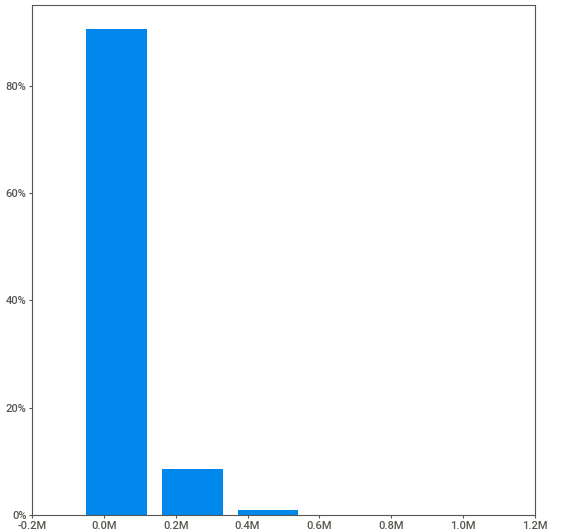
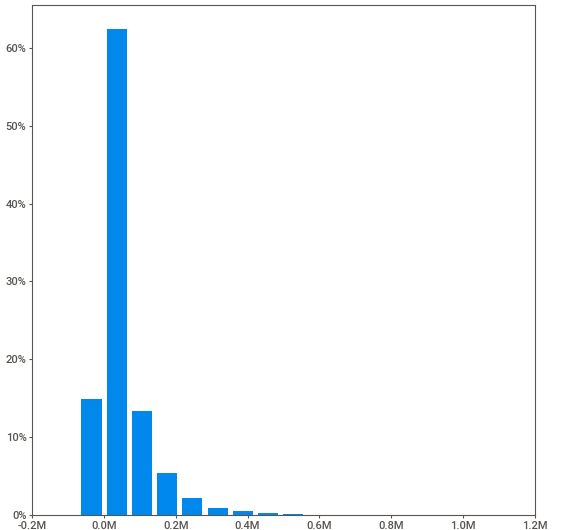
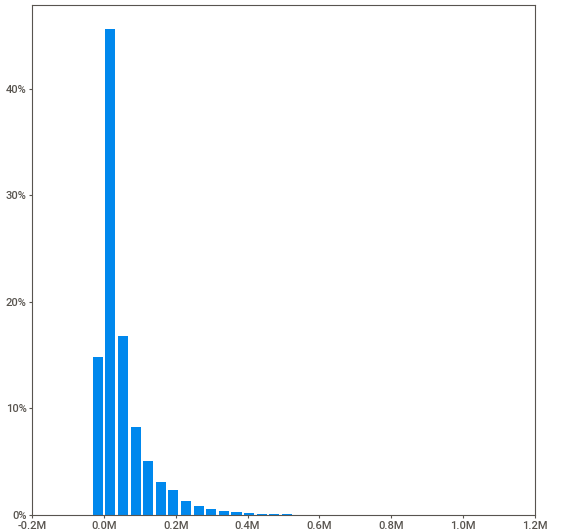
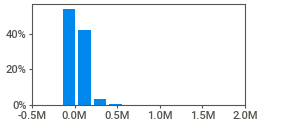
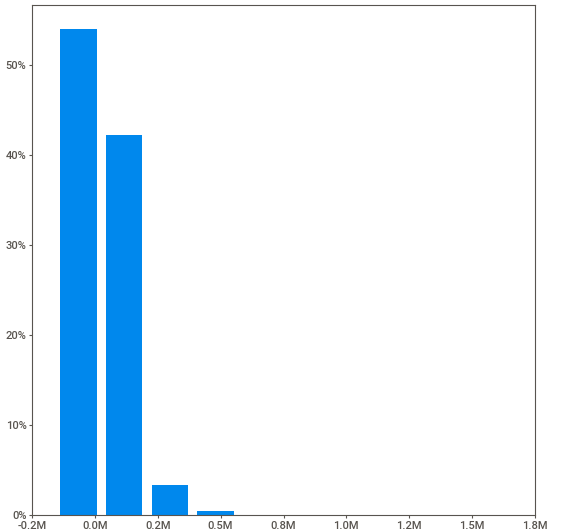
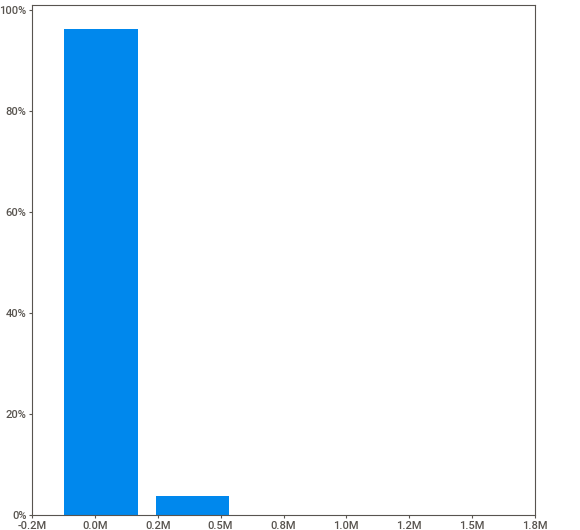
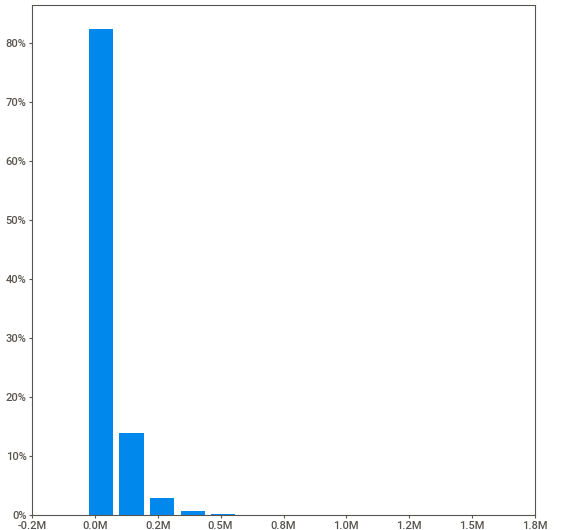
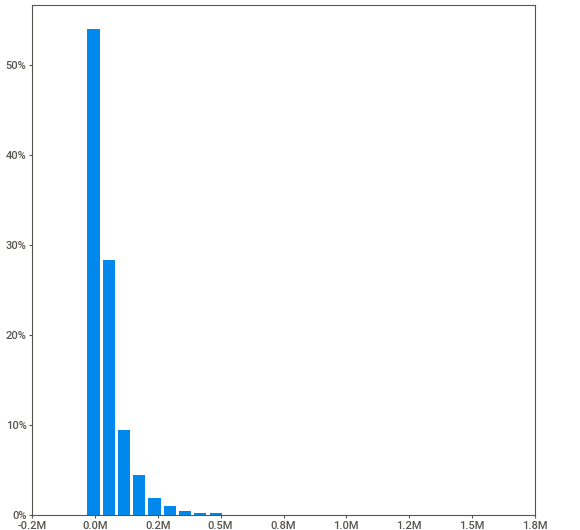
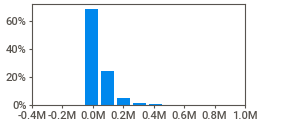
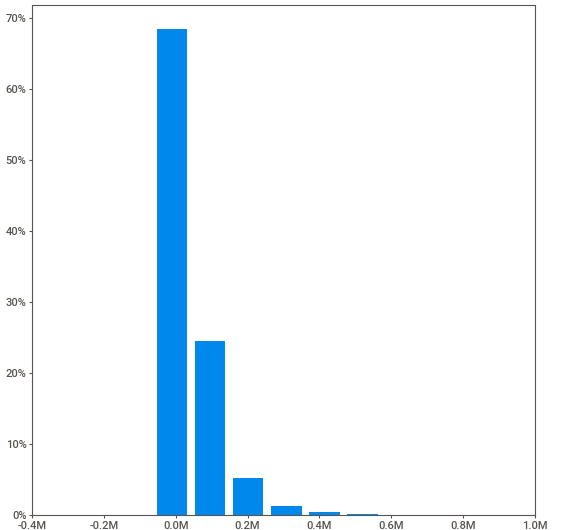
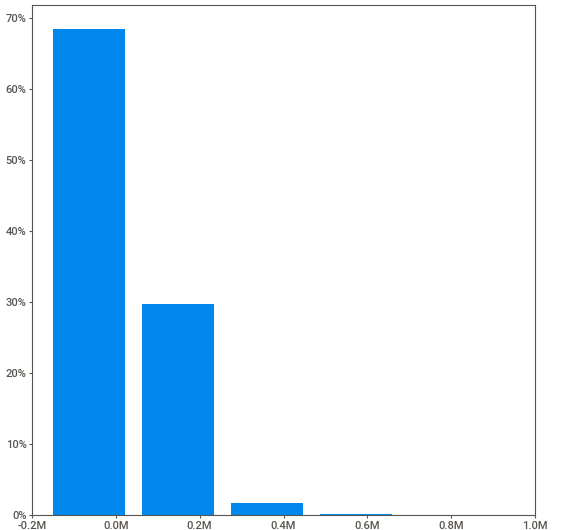
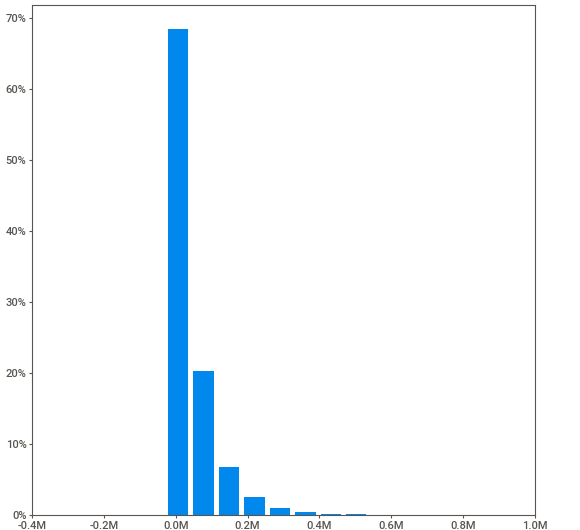
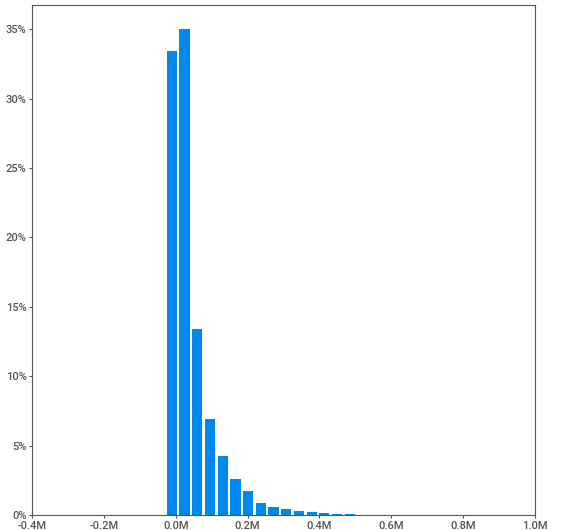
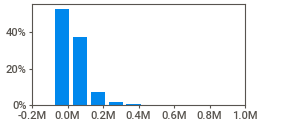
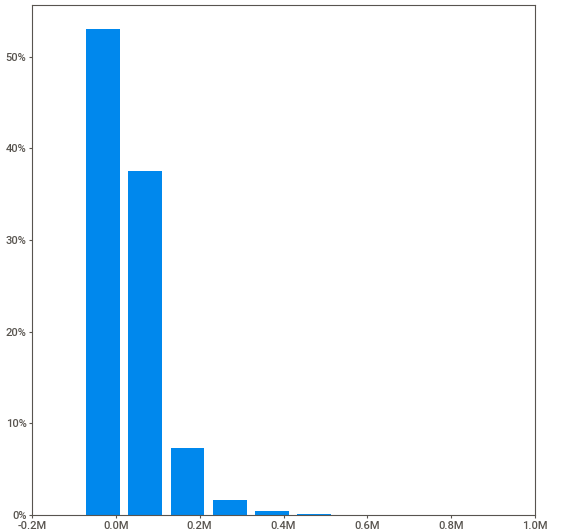
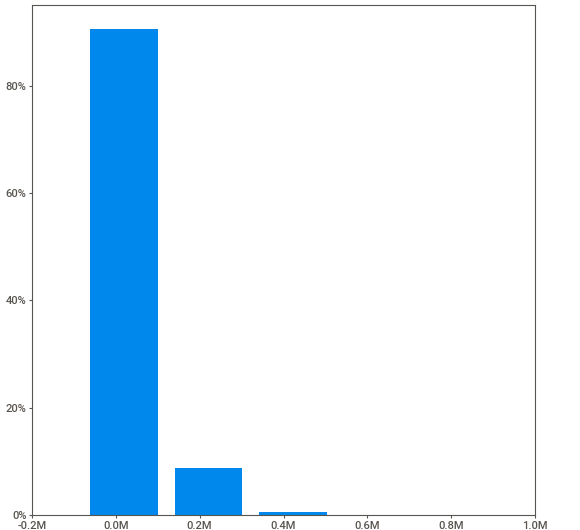
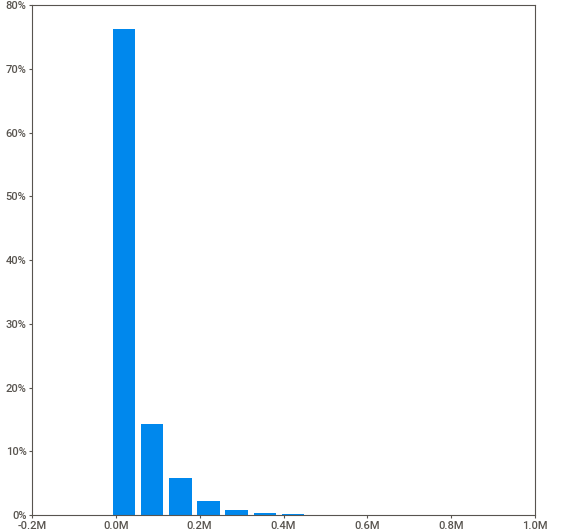
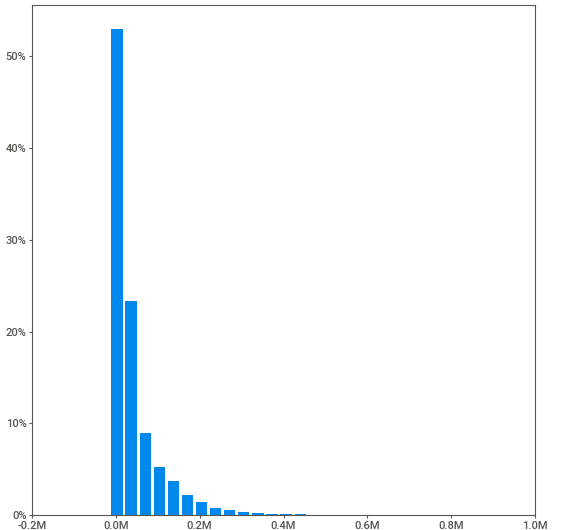
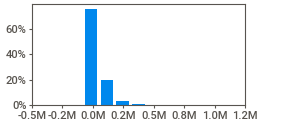
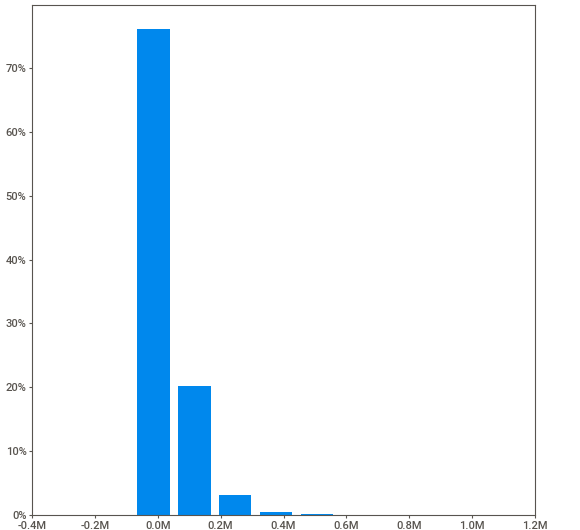
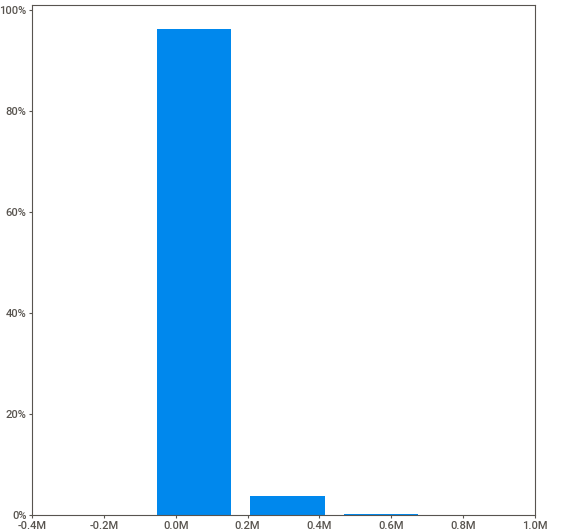
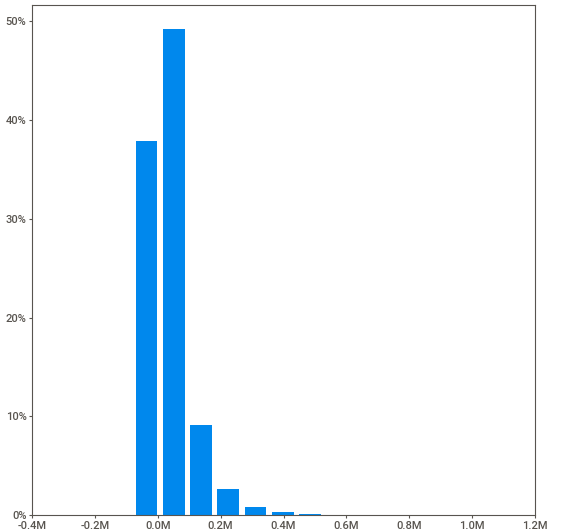
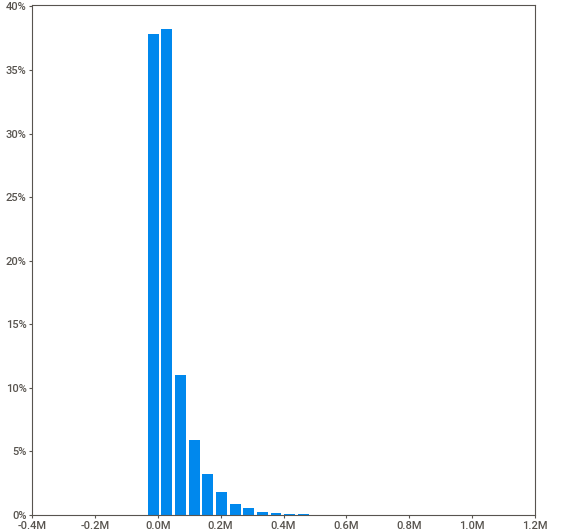
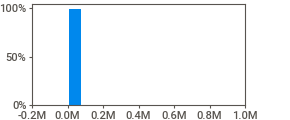
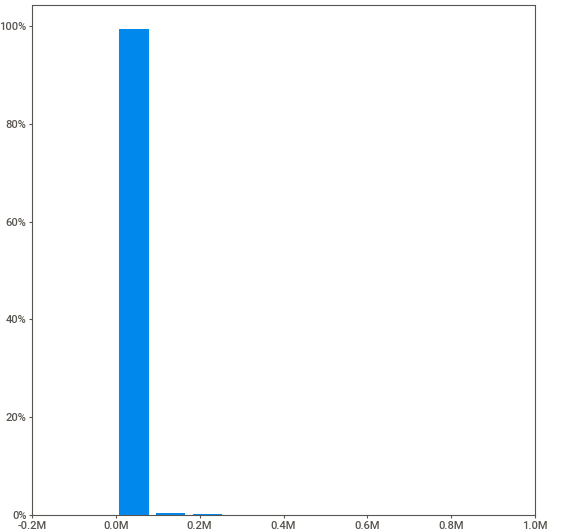
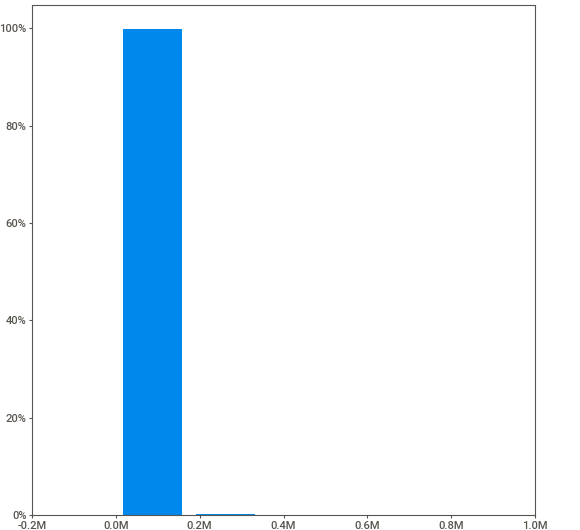
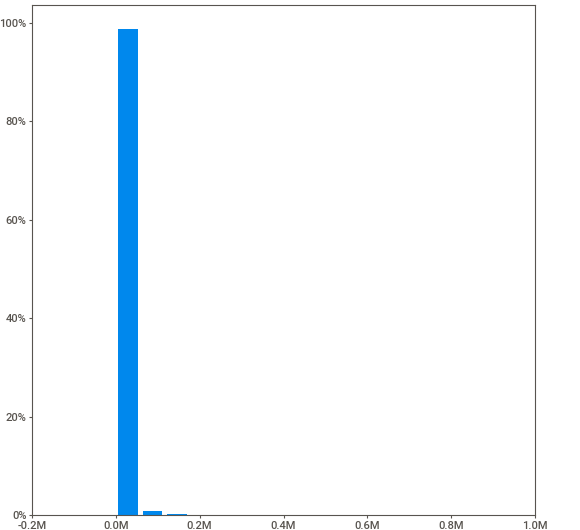
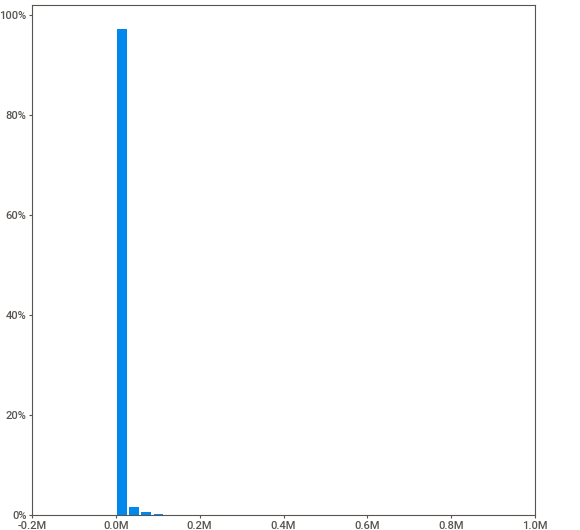
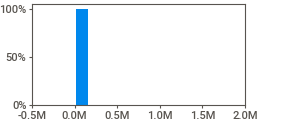
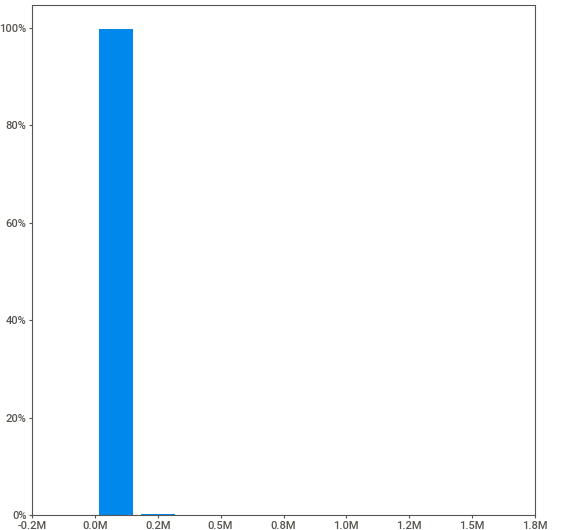
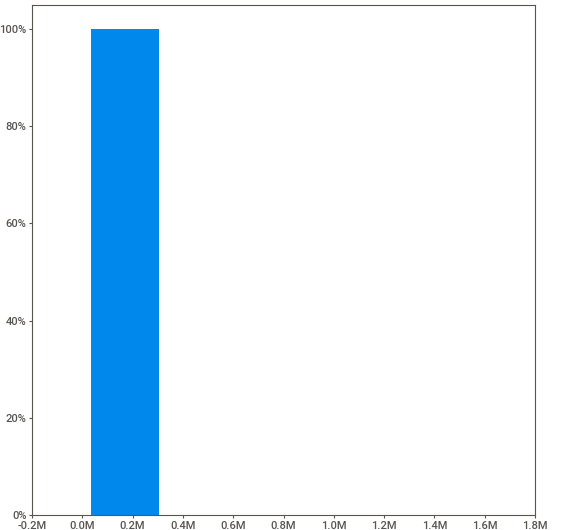
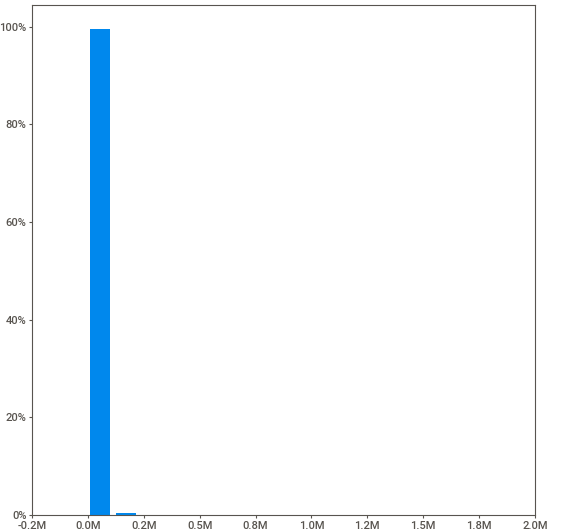
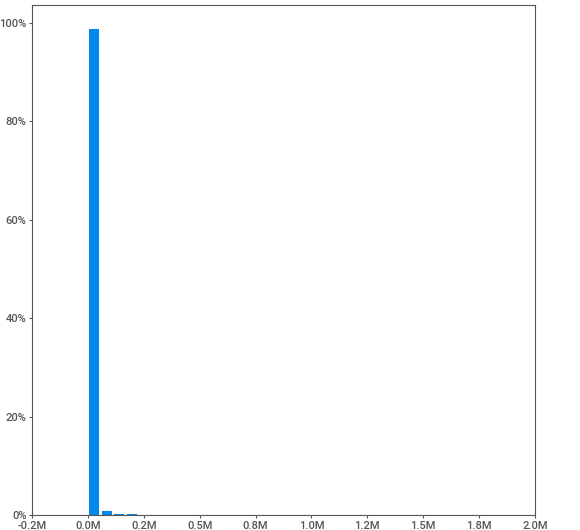
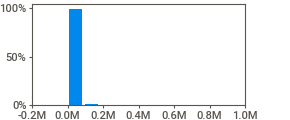
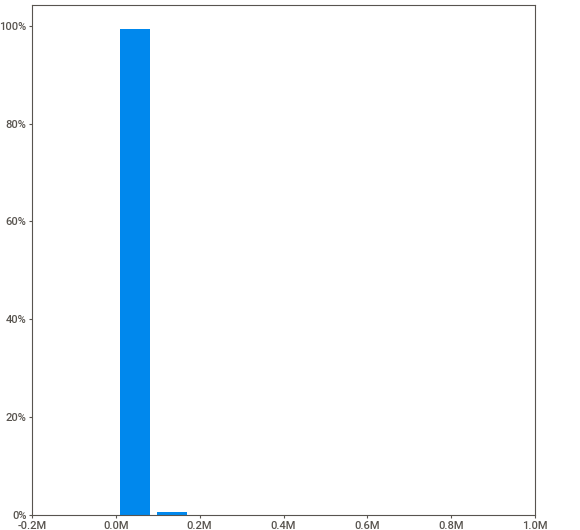
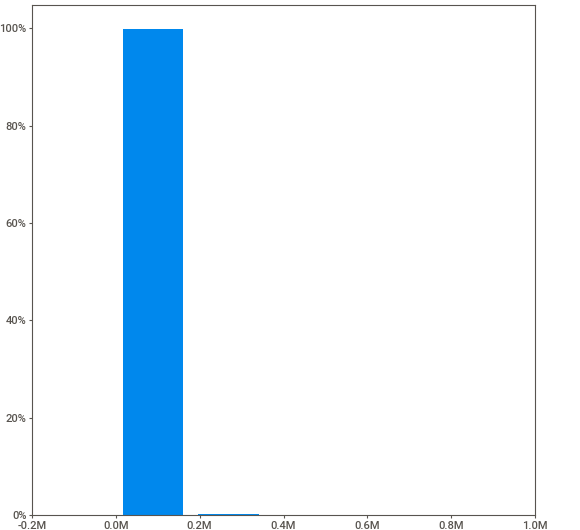
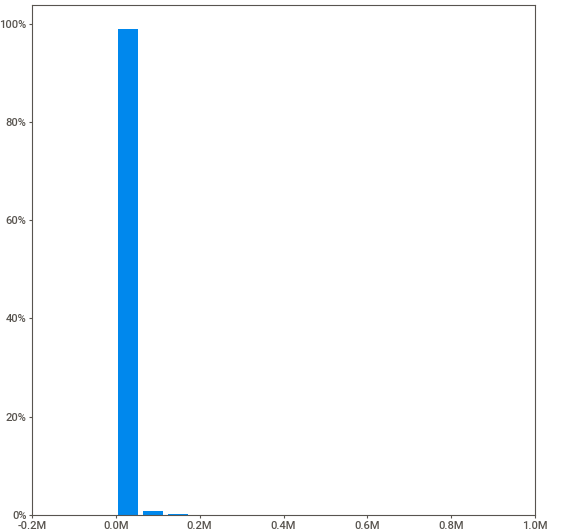
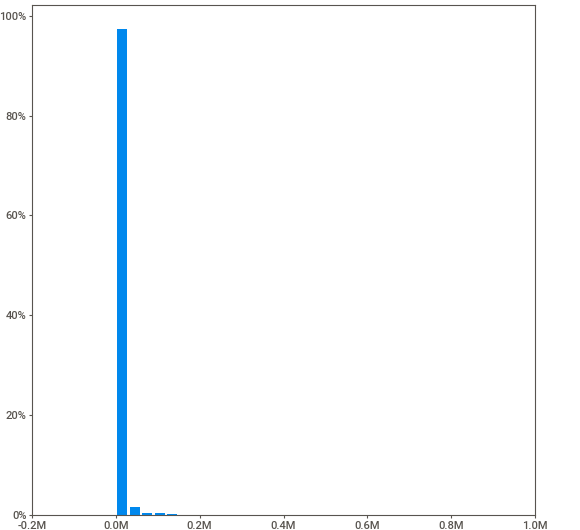
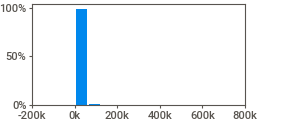
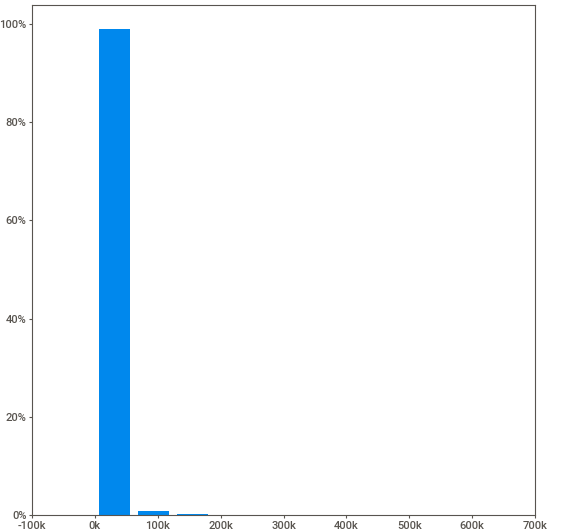
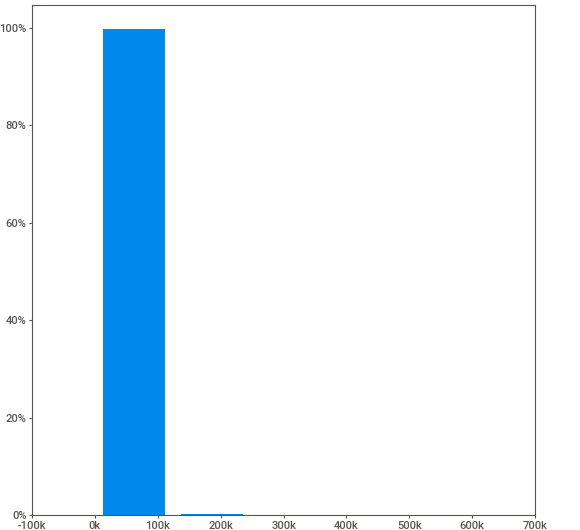
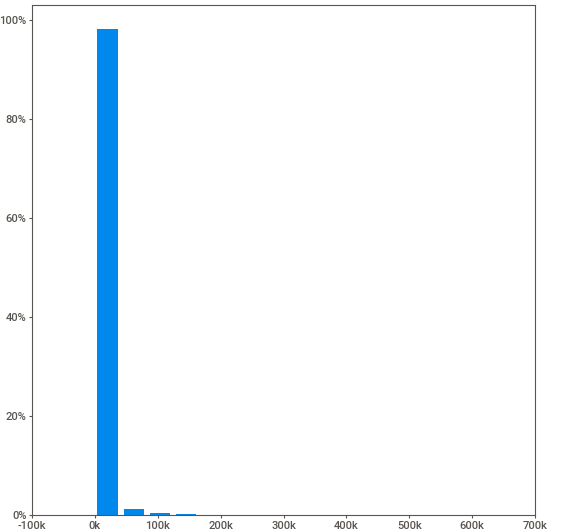
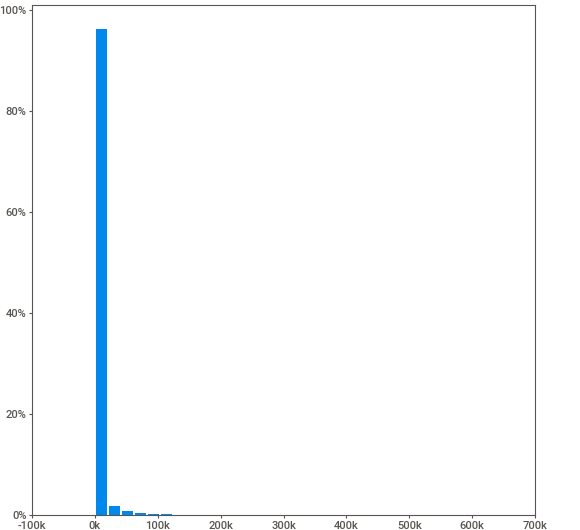
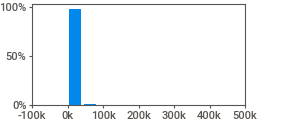
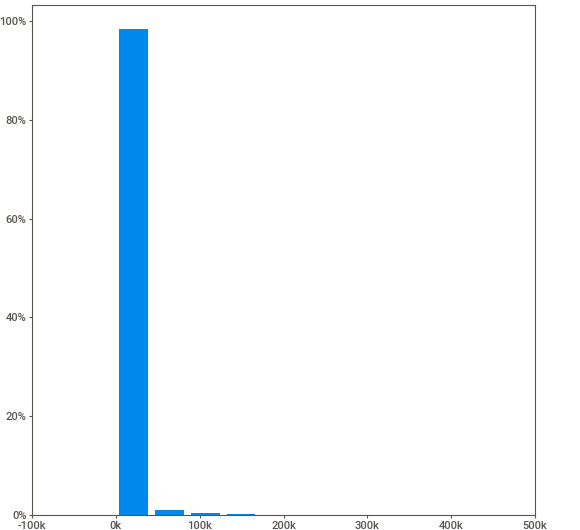
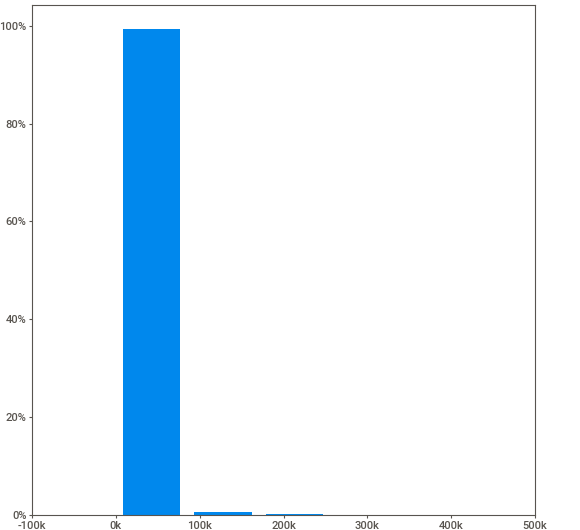
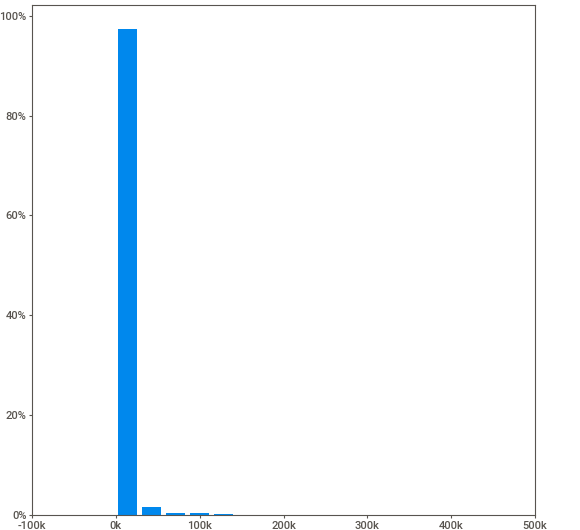
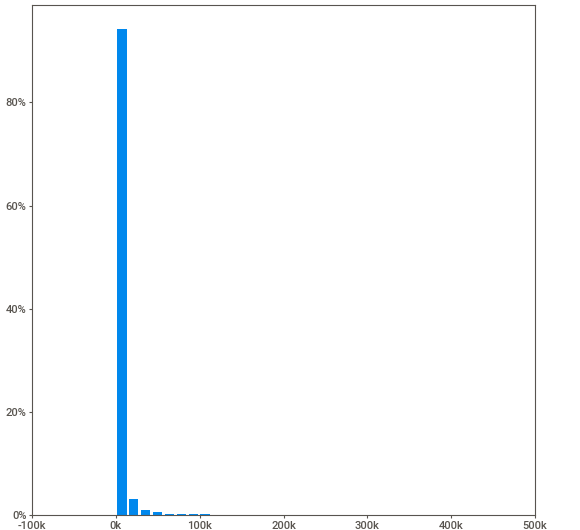
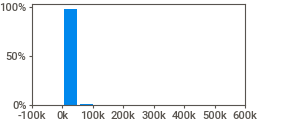
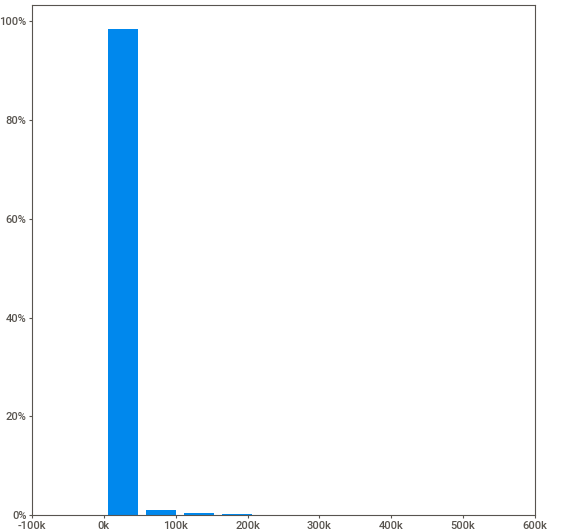
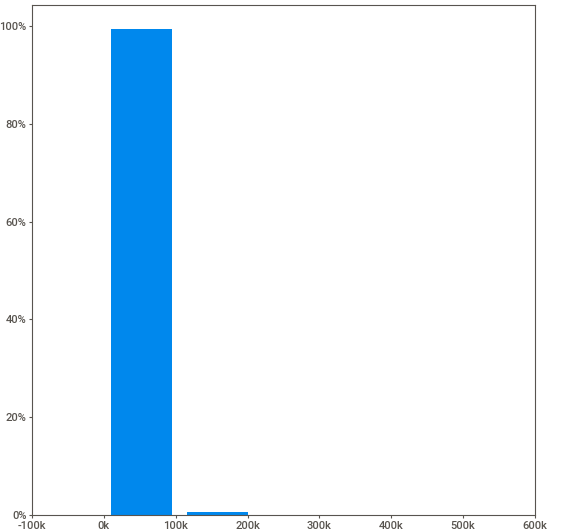
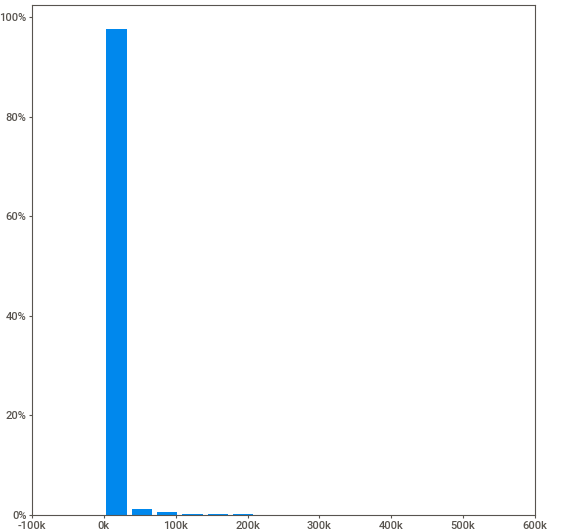
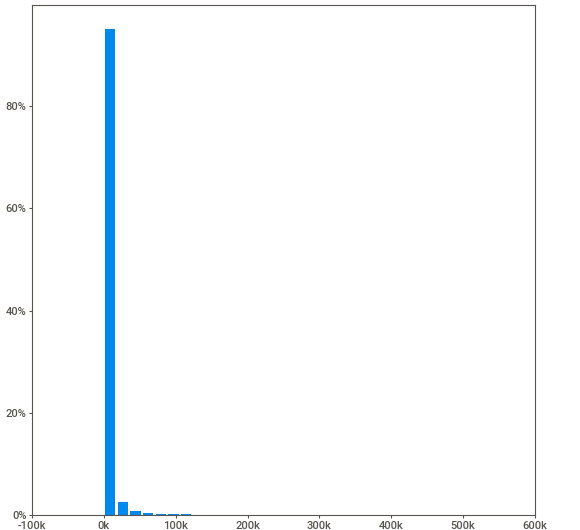
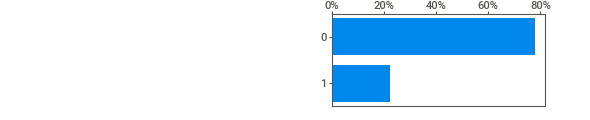
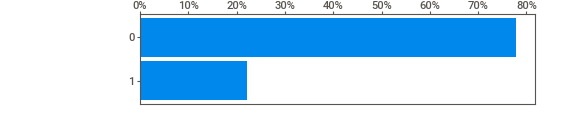
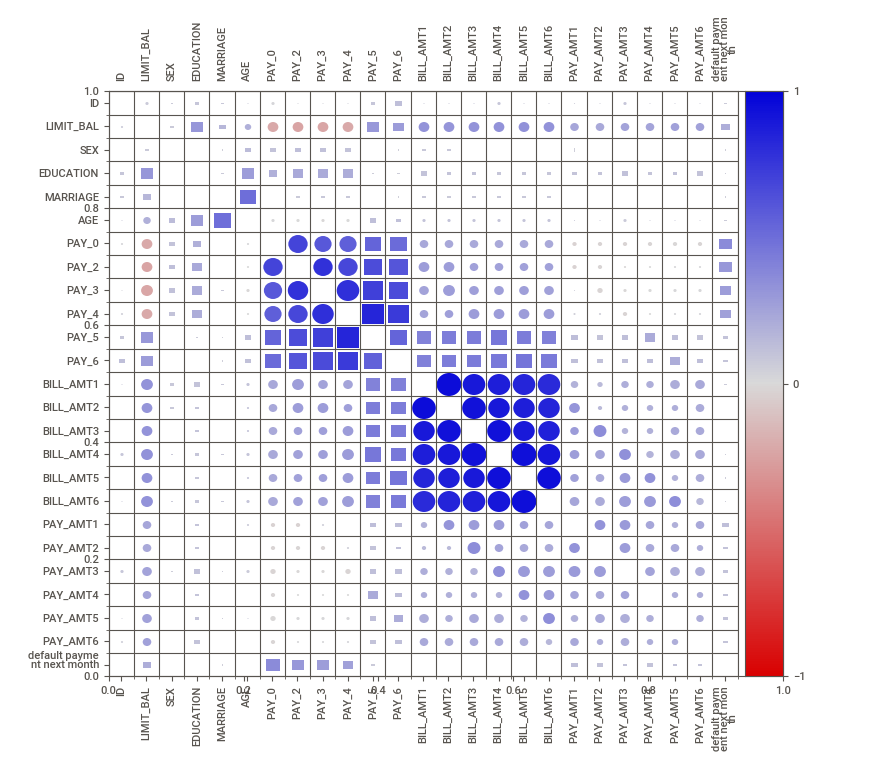
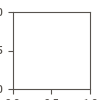

In [69]:
import sweetviz as sv
# understanding dataset with  bar chat and Association dataframe (showing uncertainty coefficient)
# using sweetviz to view target values corr df_c #EDA
# to view sweetviz kindly click on file:///Users/saheedadeitan/Downloads/BusyQA_bootcamp/SWEETVIZ_REPORT.html
my_report = sv.analyze(df)
my_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None,
                file_layout=None,
                file_scale=None)


# Outliers
# more than 30% dont remove outliers but less than 30% you remove outliers -->
# checking for outliers , only for values 
# function for removing outlier based on IQR
# It is effective for datasets that may not follow a normal distribution.
# it should only be used for continuous variable

# Reason for not using outliers
#  Not all outliers are errors; some may represent legitimate data points with unique characteristics.
#  the method of outlier detection and removal should be carefully chosen to avoid biasing the dataset or losing valuable information.
# i decided not to remove outlier because when i did, 'default payment next month' column had few values. Like most of it were removed and it affected my data


In [26]:
# removing ID column before splitting
df_d = df.drop(columns=['ID'])
# confirming if ID has been removed
df_d

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# NB to myself.
# the general syntax for iloc is df.iloc[:, :-1]: This selects all rows (:) and all columns up to the last one (:-1)
# It effectively excludes the last column from the selection, resulting in a DataFrame containing only the feature columns (independent variables).
# df.iloc[:, -1]: This selects all rows (:) and only the last column (-1). It effectively selects only the last column of the DataFrame, which typically represents the target variable (dependent variable).

#splitting X and y variables

In [28]:
#splitting X and y variables,
# we remove ID and focused from LIMIT_BAL to PAY_AMT6
X = df_d.iloc[:, :23] 
y = df['default payment next month']


In [29]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [30]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

Scaling data

In [31]:
# scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_s = sc.fit_transform(X)



In [32]:
print(df_s)

[[-1.13672015  0.81016074  0.18582826 ... -0.30806256 -0.31413612
  -0.29338206]
 [-0.3659805   0.81016074  0.18582826 ... -0.24422965 -0.31413612
  -0.18087821]
 [-0.59720239  0.81016074  0.18582826 ... -0.24422965 -0.24868274
  -0.01212243]
 ...
 [-1.05964618 -1.23432296  0.18582826 ... -0.03996431 -0.18322937
  -0.11900109]
 [-0.67427636 -1.23432296  1.45111372 ... -0.18512036  3.15253642
  -0.19190359]
 [-0.90549825 -1.23432296  0.18582826 ... -0.24422965 -0.24868274
  -0.23713013]]


In [33]:
df_s

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [35]:
#train_test_split- train our model
import pandas as pd 
from sklearn.model_selection import train_test_split
# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(df_s, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 23)
(22500,)
(7500, 23)
(7500,)


In [36]:
# X_test.head()or 
print(X_test[:5])

[[-1.13672015 -1.23432296 -1.0794572   0.85855728 -0.2696428   0.90471219
   1.78234817  1.8099213   1.89943574  1.99987907  1.99231551 -0.45158548
  -0.44652132 -0.40312715 -0.38565616 -0.33812015 -0.32884527 -0.34194162
  -0.15890131 -0.29680127 -0.2059299  -0.31413612 -0.25715582]
 [-1.13672015  0.81016074  0.18582826  0.85855728 -0.05267012  0.01486052
   0.1117361   1.8099213   0.18874609  0.23491652  0.25313738 -0.47118223
  -0.41915123 -0.40971708 -0.37715337 -0.3505387  -0.31688956 -0.13666485
  -0.25698952 -0.24000461 -0.30806256 -0.24868274 -0.29338206]
 [ 0.48183311  0.81016074 -1.0794572  -1.05729503  0.92370693  0.90471219
  -0.72356993 -0.69666346 -0.66659873 -0.64756476 -1.48604076 -0.64289491
  -0.67764964 -0.63662986 -0.65799433 -0.66305853 -0.65272422 -0.28464525
  -0.13229597 -0.24380999 -0.30806256 -0.31413612 -0.29338206]
 [-0.52012843 -1.23432296  0.18582826 -1.05729503  0.70673426  0.01486052
   0.1117361   0.1388648   0.18874609  0.23491652  0.25313738  0.641093

In [37]:
y_test.head()

8225     0
10794    0
9163     0
26591    0
6631     0
Name: default payment next month, dtype: int64

In [38]:
y_train.value_counts()

default payment next month
0    17496
1     5004
Name: count, dtype: int64

In [39]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

Accuracy  81.47999999999999
recall  0.2261029411764706
f1  0.3469675599435825
precision  0.7454545454545455


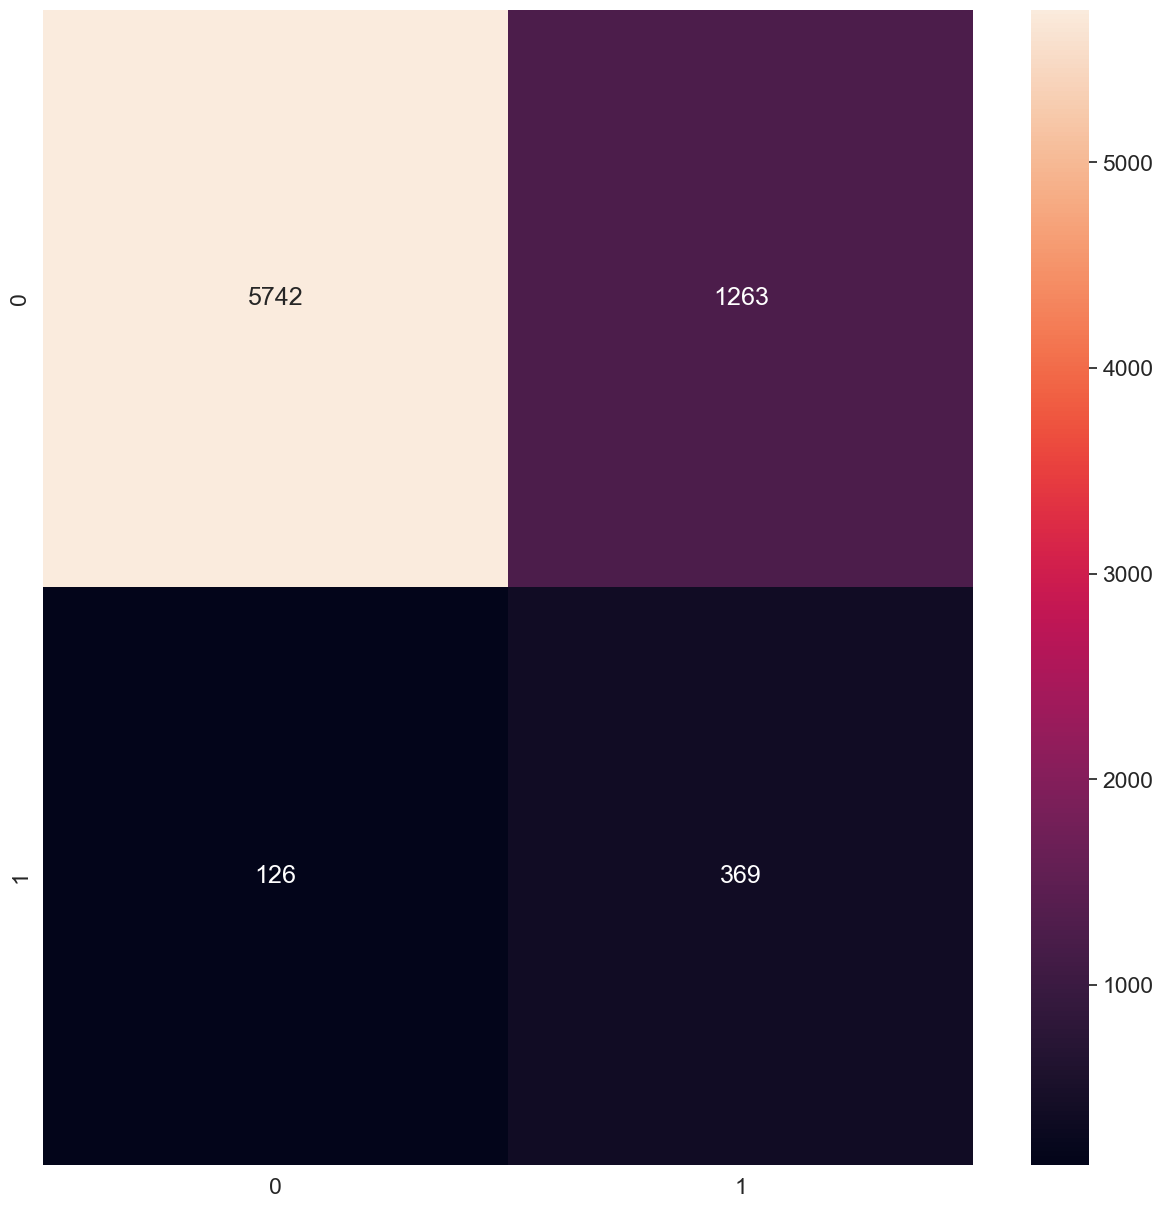

In [42]:
#LogisticRegression Model 

# I decided to use Logistic regression because it is straightforward, and can handle large dataset efficiently.
# metrics to evaluate the performance of classification algorithms: F1, Accuracy, Recall, Precision
# F1 Score considers both precision and recall metric


LR = LogisticRegression()
#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
accuracy = LR.score(X_test, y_test)
print("Accuracy ", LR.score(X_test, y_test)*100)

# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred) )

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


Accuracy  78.24
recall  0.0
f1  0.0
precision  0.0


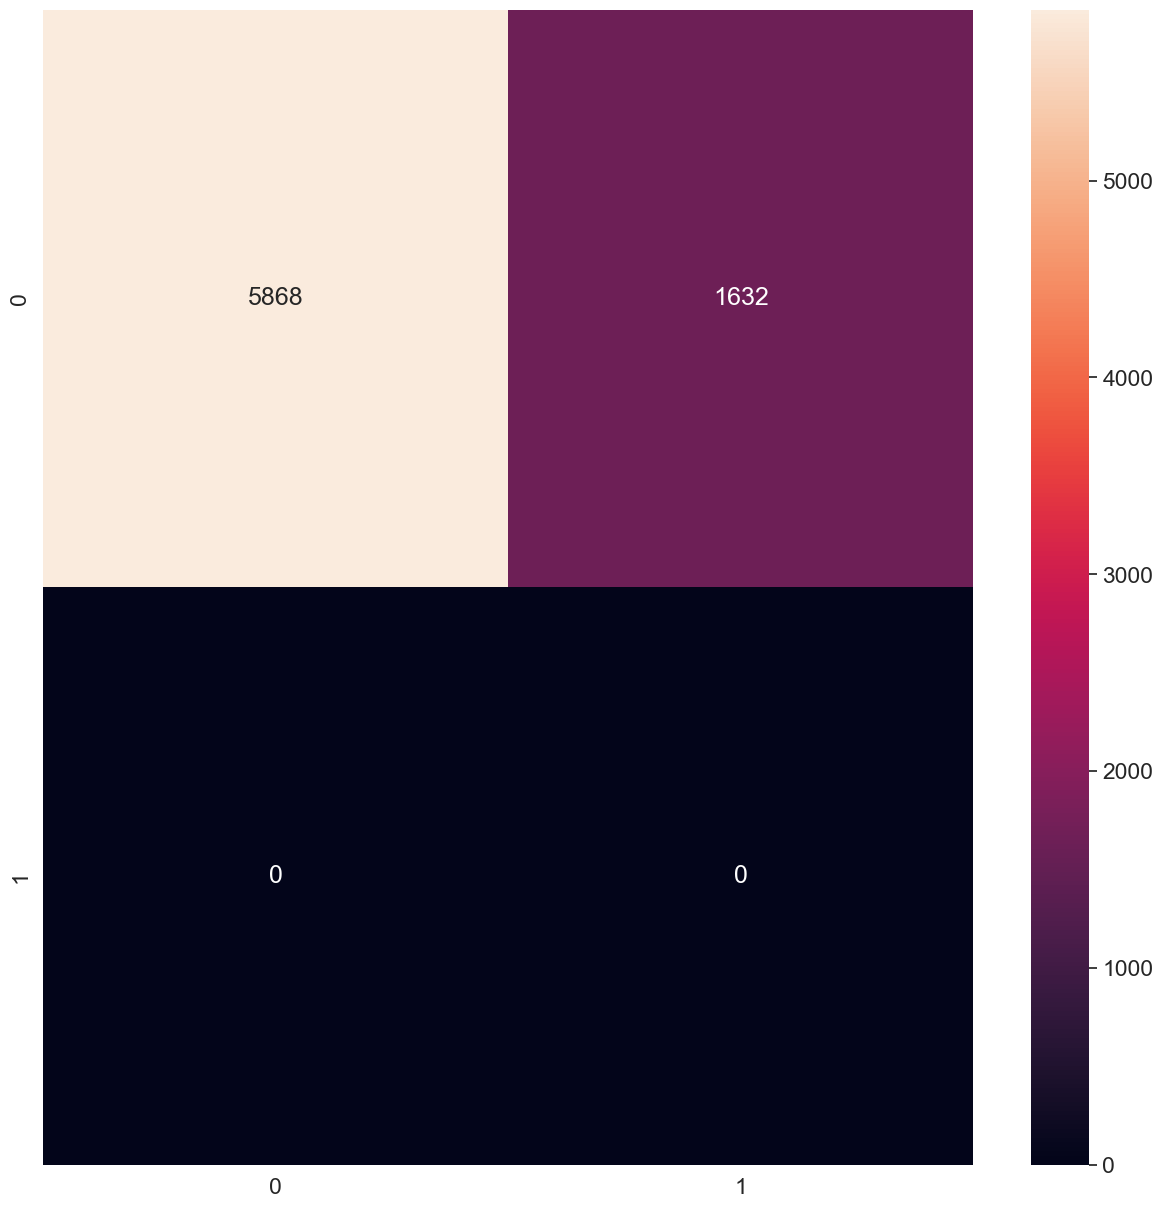

In [51]:
#XGBoost Model
# We should use this algorithm when we require fast and accurate predictions after the model is deployed.

XGB = XGBClassifier(loss = 'deviance',
                        learning_rate = 0.01,
                        n_estimators = 10,
                        max_depth = 5,
                        verbosity=0,
                        random_state=0)

#fiting the model
XGB.fit(X_train, y_train)

#prediction
y_pred = XGB.predict(X_test)

#Accuracy
accuracy = XGB.score(X_test, y_test)
print("Accuracy ", XGB.score(X_test, y_test)*100)


# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred) )

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))


#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy  81.42666666666668
recall  0.3247549019607843
f1  0.4321239298817774
precision  0.6455542021924482


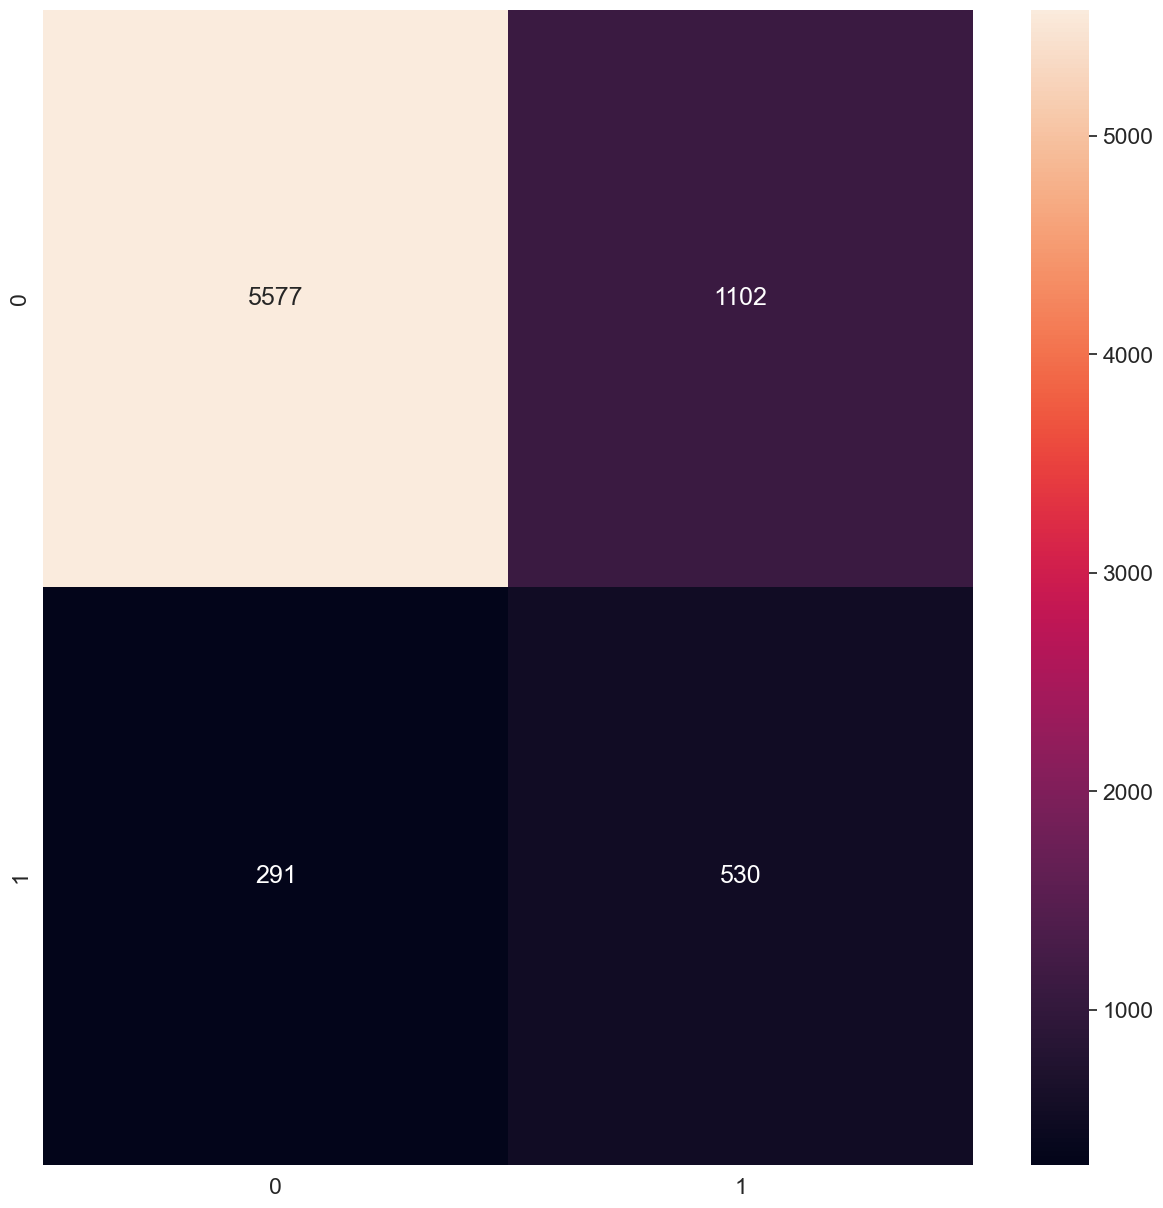

In [45]:
# Decision Tree Model

# Decision Trees for both classification and regression tasks.
# It can handle both numerical and categorical features without requiring preprocessing like normalization or encoding.




DT = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best',
                                           random_state=0)

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
accuracy = DT.score(X_test, y_test)
print("Accuracy ", DT.score(X_test, y_test)*100)


# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred) )

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))


#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


Accuracy  81.72
recall  0.3633578431372549
f1  0.4638247946812671
precision  0.6410810810810811


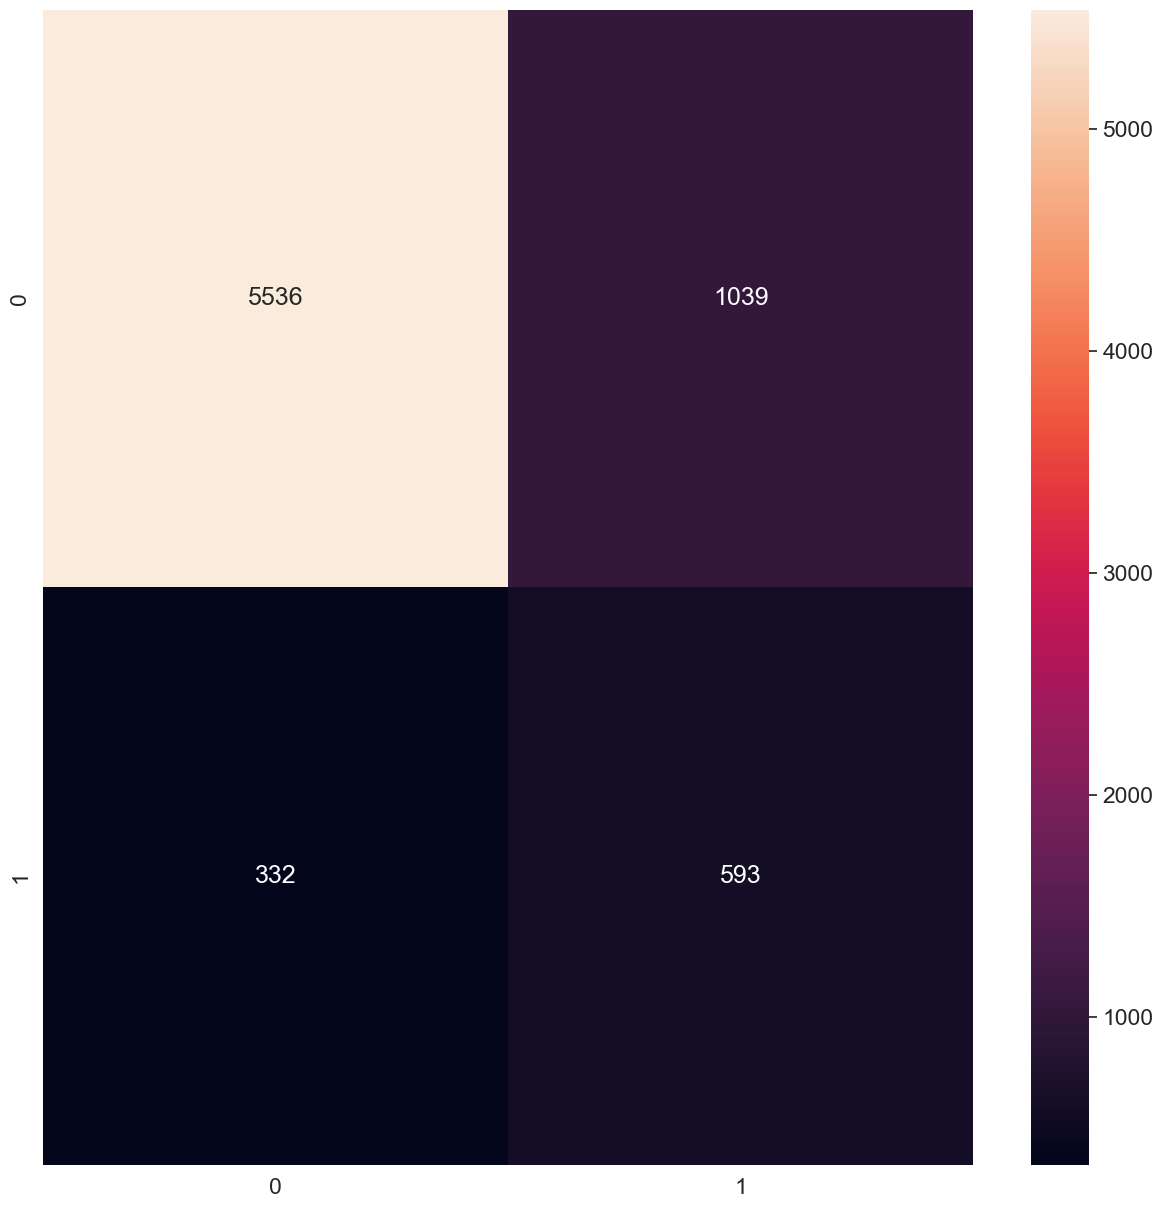

In [47]:
#Model RandomForest
# It is a versatile and powerful algorithm with high accuracy, robustness, and ability to handle complex datasets

RF = RandomForestClassifier()

#fiting the model
RF.fit(X_train, y_train)

#prediction
prediction = y_pred 
y_pred = RF.predict(X_test)

#Accuracy
accuracy = RF.score(X_test, y_test)
print("Accuracy ", RF.score(X_test, y_test)*100)

# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred))

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


# CLassifier report

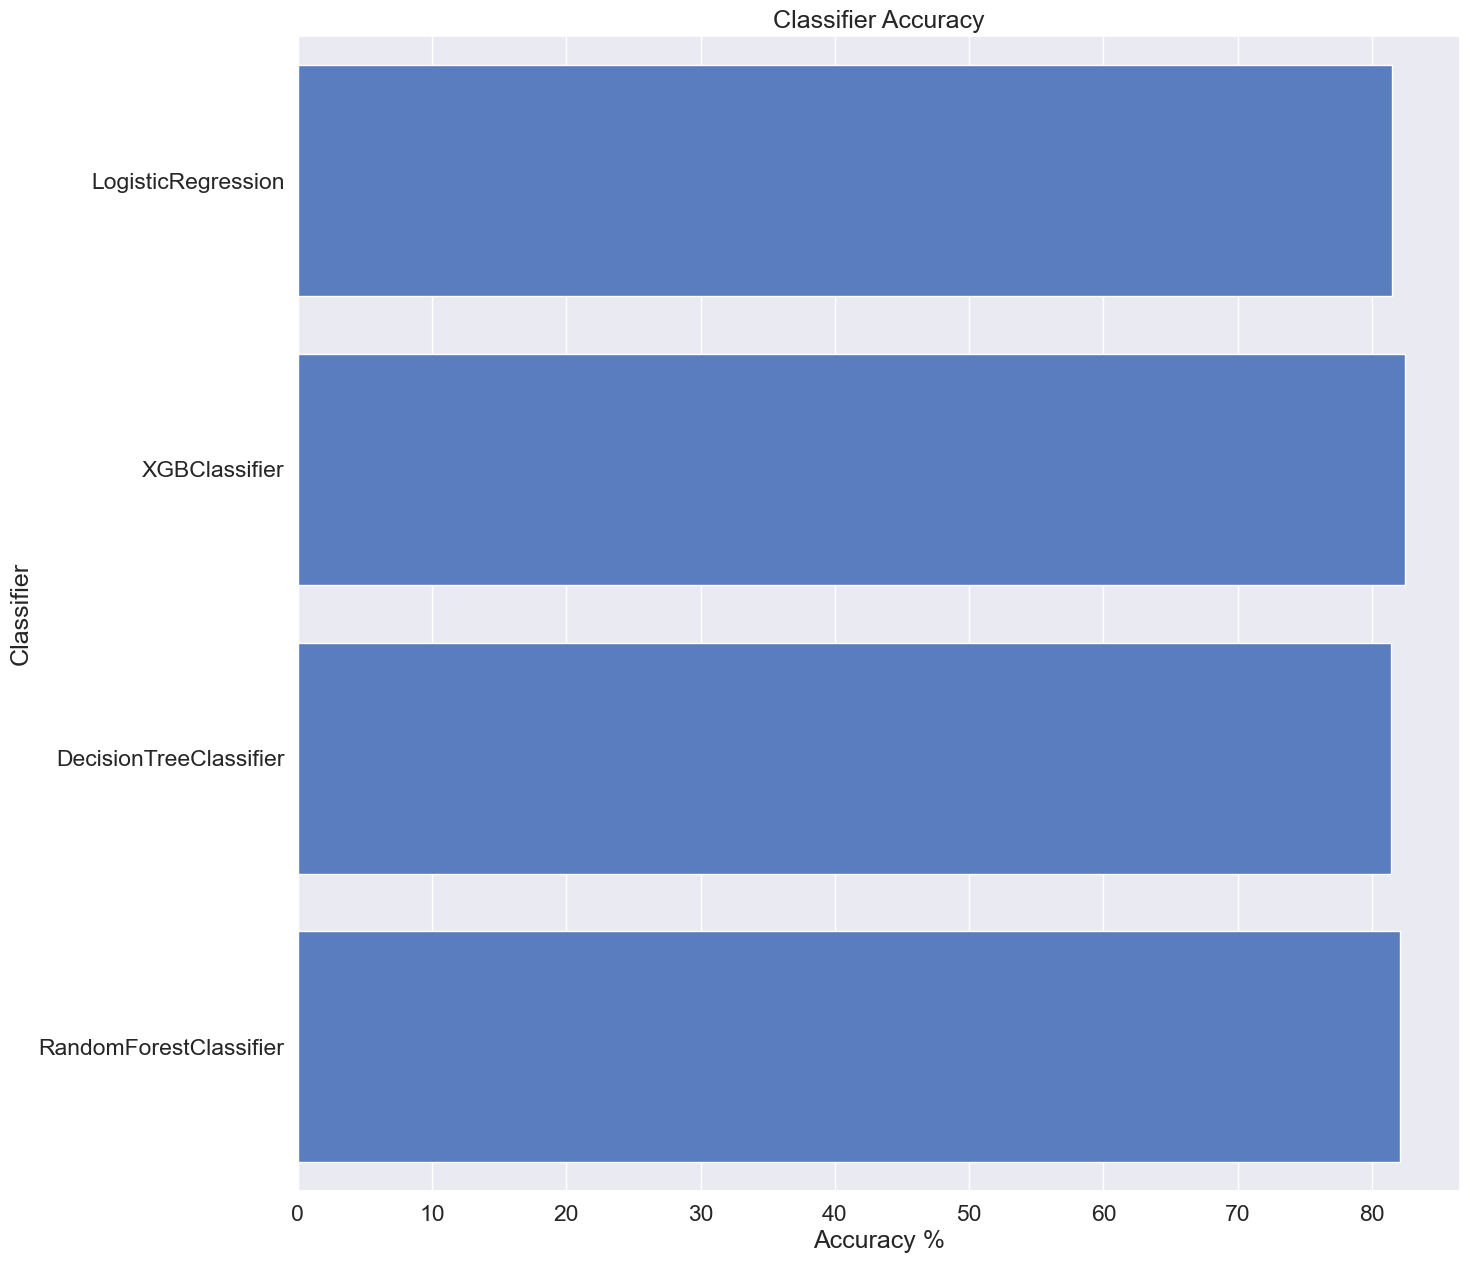

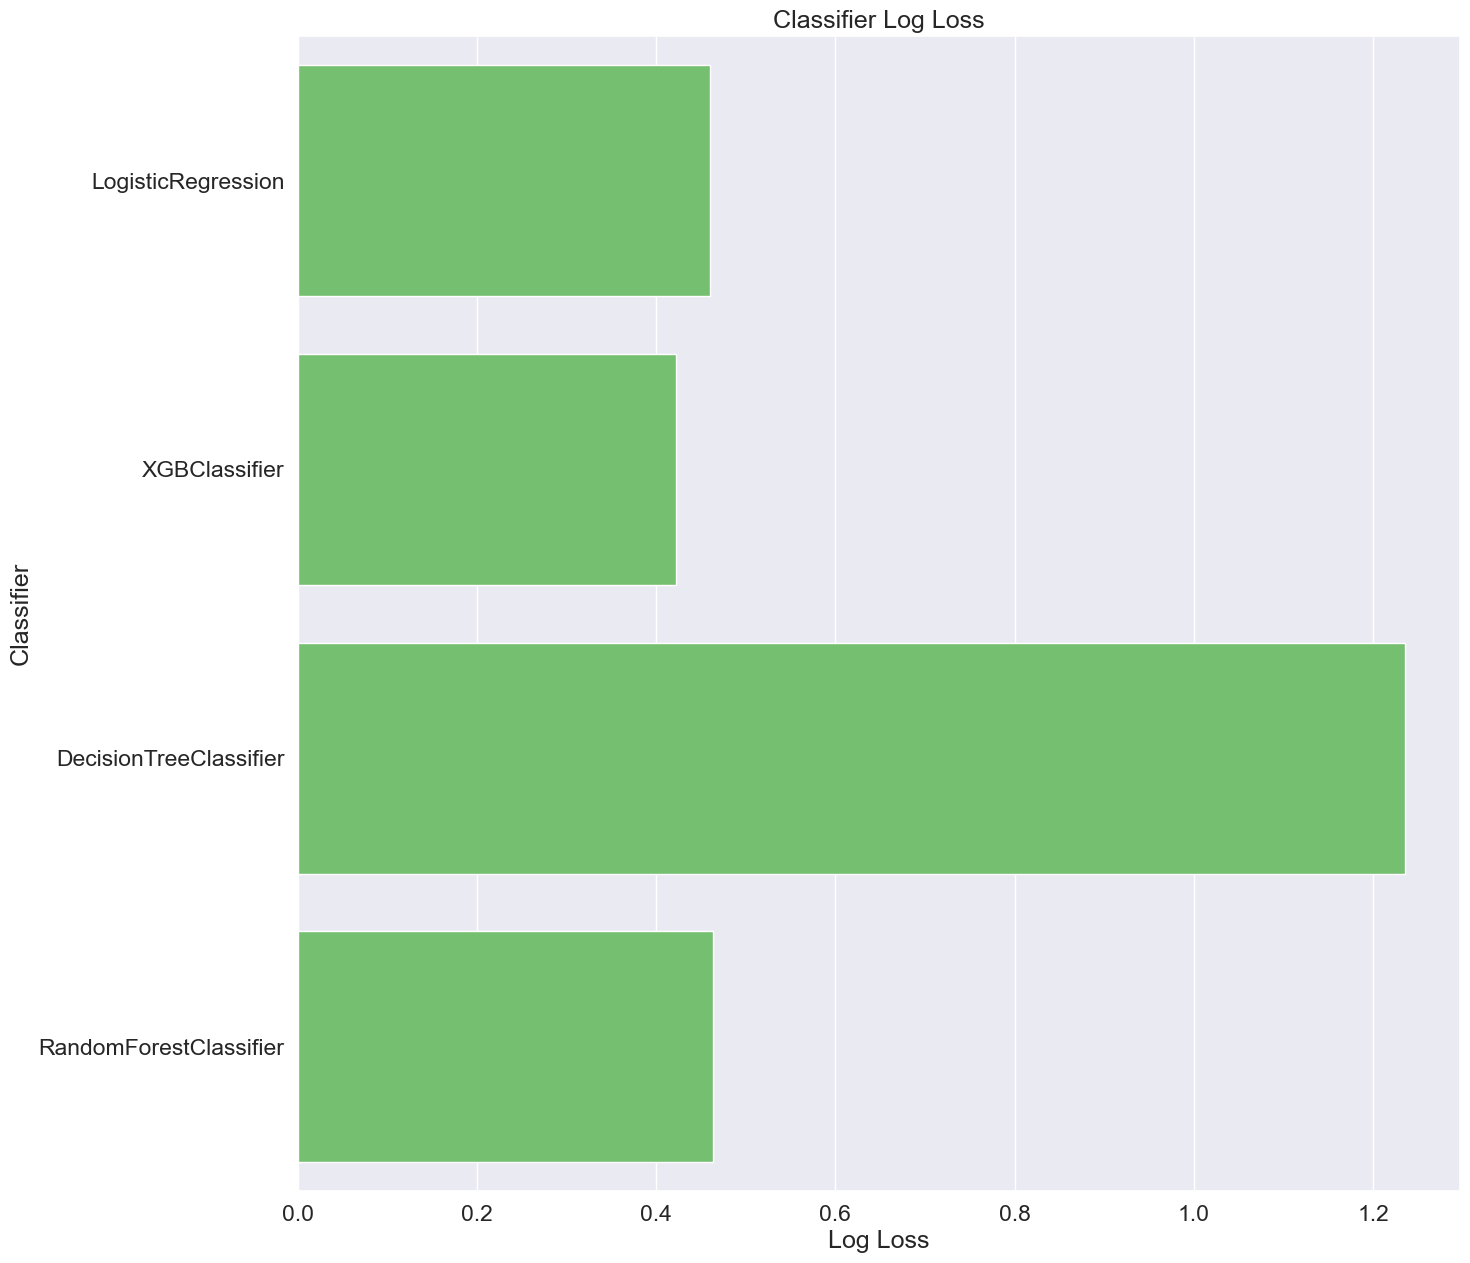

In [52]:
classifiers = [ LogisticRegression(),
                # MultinomialNB(),
                # GradientBoostingClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=0),
                XGBClassifier(loss = 'deviance', n_estimators = 10,max_depth = 5,random_state=2020,verbosity=0),
                DecisionTreeClassifier(criterion= 'entropy',max_depth = 10,splitter='best', random_state=0),
                RandomForestClassifier(),
                # KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute')
              ]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)


log_entries = []

for clf in classifiers:
    model = clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    # Accuracy
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    
    # Log Loss
    train_predictions_proba = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions_proba)
    
    log_entries.append([name, acc * 100, ll])
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)


# Convert list of entries to DataFrame
log = pd.DataFrame(log_entries, columns=log_cols)

    
#Visualization 
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()   


From above report, in terms of accuracy they all are above 80%(81.71 for RF, 81.4 for DT and 81.4 for LR) except for XGB 78.2
and for Log Loss , XGB has the lowest and decision tree has the highest

# Hyperparameter tuning

In [55]:
rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [62]:
#RandomSearch
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 6, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 30, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 6, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [63]:
# Use the random grid to search for best hyperparameters. this can be done on both large and small data.
# especially if you want a quick result.

# First create the base model to tune
rf = RandomForestClassifier()


# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations(n_iter), and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total tim

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 30, 50]},
                   random_state=42, verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

Accuracy  81.47999999999999
recall  0.2261029411764706
f1  0.3469675599435825
precision  0.7454545454545455


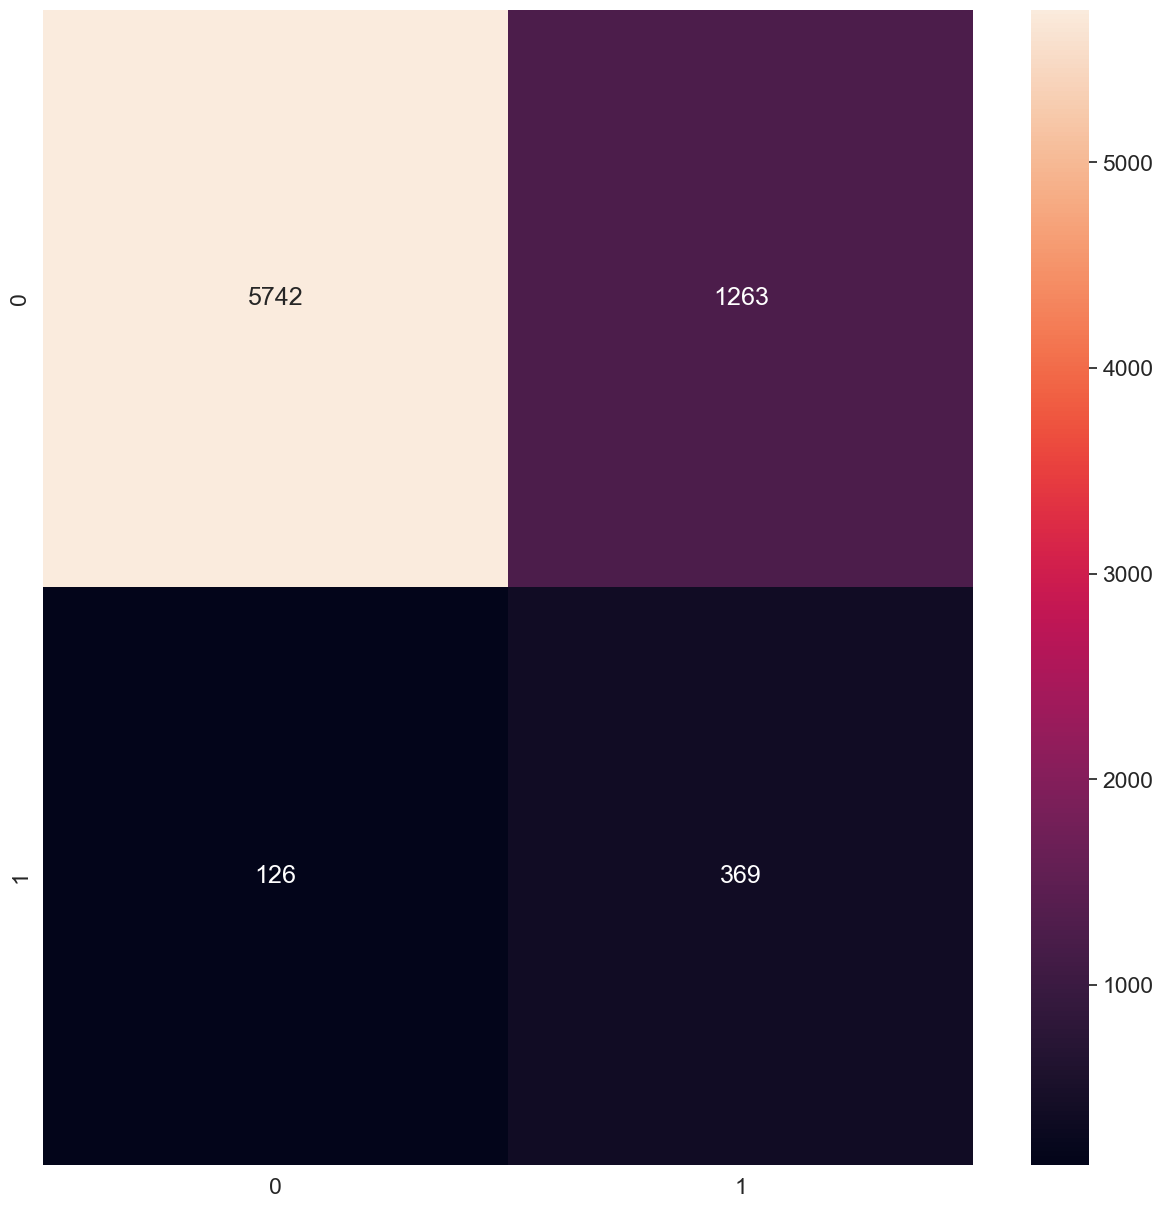

In [67]:

LR = LogisticRegression()
#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
accuracy = LR.score(X_test, y_test)
print("Accuracy ", LR.score(X_test, y_test)*100)

# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred) )

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

in conclusion, 
LR 
Accuracy  81.47999999999999
recall  0.2261029411764706
f1  0.3469675599435825
precision  0.7454545454545455

XGB
Accuracy  78.24
recall  0.0
f1  0.0
precision  0.0

Decision tree
Accuracy  81.42666666666668
recall  0.3247549019607843
f1  0.4321239298817774
precision  0.6455542021924482

Random forest
Accuracy  81.72
recall  0.3633578431372549
f1  0.4638247946812671
precision  0.6410810810810811

using F1 score, the best model is Random forest followed by Decision tree and  both precision, recall and accuracy are almost in the same range